<a href="https://colab.research.google.com/github/ThiRCosta/MVP-Sprint_2/blob/main/SP2_MVP_ThiagoRCosta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Sprint 2 - PUC Rio - 2023

## Aluno: Thiago Rodrigues da Costa

## Trabalho A - Métodos clássicos para um problema de classificação

### 1. Introdução e Definição do Problema



O Ministério da Saúde (MS), por meio da Secretaria de Vigilância em Saúde (SVS), desenvolve a vigilância da Síndrome Respiratória Aguda Grave (SRAG) no Brasil, desde a pandemia de Influenza A(H1N1)pdm09. A partir disso, a vigilância de SRAG foi implantada na rede de vigilância de Influenza e outros vírus respiratórios, que anteriormente atuava exclusivamente com a vigilância sentinela de Síndrome Gripal (SG).

De 2009 até 2018, o sistema oficial para o registo dos casos e óbitos por SRAG era o Sistema de Informação de Agravos de Notificação – Sinan Web Influenza. A partir de 2019, o sistema oficial passou a ser o Sistema de Informação da Vigilância Epidemiológica da Gripe (SIVEP-Gripe).

As informações do dataset utilizado neste projeto foi extraído do DataSUS (https://opendatasus.saude.gov.br). Esclarece-se que as informações extraídas e disponiblizadas neste dataset passaram por tratamento que envolve a anonimização, em cumprimento a Lei 13.709/2018.

O dataset usado nesse projeto é referente apenas ao ano de 2019 e seu objetivo é classificar o tipo de SRAG do paciente com base nos diagnósticos médicos. O dataset possui diversos atributos classificatórios relacionados aos sintomas e características da saúde do paciente (que serão as variáveis preditoras) e um atributo relacionada a classificação final da SRAG. Com base nisso, podemos dizer que nesse MVP iremos trabalhar com um problema de aprendizado supervisionado de classificação.

#### 1.1. Informações sobre os atributos

Nosso dataset possui um total de 137 atributos, porém não iremos utilizar todos nesse momento. Alguns deles não estão no dicionário de dados, ou seja, desconhecemos as informações contidas e alguns outros optamos por não utilizar nesse trabalho.

Abaixo estão as descrições de cada atributo que iremos utilizar nesse trabalho:

1. **DT_NOTIFIC** - Data de preenchimento da ficha de notificação.
1. **SG_UF_NOT** - UF do Registro do caso
1. **ID_MUNICIP** - Código do município onde está localizada a unidade de saúde (ou outra fonte notificadora) que realizou a notificação. O nome está associado ao código na tabela de municípios.
1. **CS_SEXO** - Sexo do paciente (M- Masculino / F- Feminino / I- Ignorado)
1. **NU_IDADE_N** - Idade (A composição da variável obedece o seguinte critério: 1o dígito: 1. Hora, 2. Dia, 3. Mês, 4. Ano. Ex: 3009 – nove meses, 4018 – dezoito anos)
1. **CS_ESCOL_N** - Escolaridade (0. Analfabeto, 1. Fundamental (1-9 anos), 2. Médio (1-3 anos), 3. Superior, 9. Ignorado, 10. Não se aplica. Preenchido automaticamente com a Categoria "10 - Não se aplica" quando idade menor a 7 anos de idade. Quando caso notificado > 7 anos, campo não pode ser preenchido com categoria "10 - Não se aplica".
1. **CS_GESTANT** - Idade gestacional da paciente. (Gestante 1. 1º Trimestre, 2. 2º Trimestre, 3. 3º Trimestre, 4. Idade gestacional ignorada, 5. Não, 6. Não se aplica)
1. **ID_PAIS** - País (se residente fora do Brasil)
1. **SG_UF** - Sigla da Unidade Federada de residência do paciente por ocasião da notificação.
1. **ID_MN_RESI** - Código do município de residência do caso notificado.
1. **CS_ZONA** - Zona de residência do paciente por ocasião da notificação (1. urbana, 2. rural, 3. periurbana, 9. ignorado)
1. **FEBRE** - Sinais e sintomas - febre (1. Sim, 2. Não, 9. Ignorado)
1. **TOSSE** - Sinais e sintomas - tosse (1. Sim, 2. Não, 9. Ignorado)
1. **GARGANTA** - Sinais e sintomas - dor de garganta (1. Sim, 2. Não, 9. Ignorado)
1. **DISPNEIA** - Sinais e sintomas - dispneia (1. Sim, 2. Não, 9. Ignorado)
1. **DESC_RESP** - Sinais e sintomas – Desconforto respiratorio (1. Sim, 2. Não, 9. Ignorado)
1. **SATURACAO** - Sinais e sintomas – Saturação de O2 < 95% (1. Sim, 2. Não, 9. Ignorado)
1. **OUTRO_SIN** - Sinais e sintomas – outros (1. Sim, 2. Não, 9. Ignorado)
1. **PUERPERA** - Fatores de risco/ Puerpério (1. Sim, 2. Não, 9. Ignorado)
1. **CARDIOPATI** - Fatores de risco/ Doença Cardiovascular Crônica Crônica (1. Sim, 2. Não, 9. Ignorado)
1. **SIND_DOWN** - Fatores de risco/ Síndrome de Down (1. Sim, 2. Não, 9. Ignorado)
1. **HEPATICA** - Fatores de risco/ Doença Hepática Crônica (1. Sim, 2. Não, 9. Ignorado)
1. **NEUROLOGIC** - Fatores de risco/ Doença Neurológica Crônica (1. Sim, 2. Não, 9. Ignorado)
1. **PNEUMOPATI** - Fatores de risco/Pneumatopatia Crônica (1. Sim, 2. Não, 9. Ignorado)
1. **IMUNODEPRE** - Fatores de risco/Imunodeficiencia/Imunodepressão (1. Sim, 2. Não, 9. Ignorado)
1. **RENAL** - Fatores de risco/ Doença Renal Crônica (1. Sim, 2. Não, 9. Ignorado)
1. **OBESIDADE** - Fatores de risco/ Obesidade (1. Sim, 2. Não, 9. Ignorado)
1. **OUT_MORBI** - Fatores de risco/ Outros fatores de risco (1. Sim, 2. Não, 9. Ignorado)
1. **VACINA** - Recebeu vacina contra gripe (1. Sim, 2. Não, 9. Ignorado)
1. **DT_UT_DOSE** - data da última dose de vacina contra gripe que o paciente tomou
1. **ANTIVIRAL** - Uso de antiviral? (1-Não, 2-Oseltamivir, 3-Zanamivir, 4-Outro, 9-Ignorado)
1. **HOSPITAL** - Ocorreu internação? (1 Sim, 2 Não, 9 Ignorado)
1. **UTI** - Foi internado em UTI? (1 Sim, 2 Não, 9 Ignorado)
1. **SUPORT_VEN** - Fez uso de suporte ventilatório? (1.Não usou, 2.Sim, invasivo, 3.Sim, não invasivo, 9 Ignorado)
1. **AMOSTRA** - Coletou que tipo de amostra? (1-Não coletou, 2-Secreção de Oro e Nasofaringe, 3-Tecido postmortem, 4-Lavado Brocoalveolar, 5-Outra, 9-Ignorado)
1. **CLASSI_FIN** - Classificação final da SRAG (1-SRAG por Influenza, 2- SRAG por outros vírus respiratórios, 3- SRAG por outros agentes etiológicos, 4- SRAG não especificado)
1. **CRITERIO** - Critério de confirmação (1. Laboratorial, 2.Clínico-Epidemiológico, 3. Clínico)
1. **EVOLUCAO** - Evolução do caso (1-Recebeu alta por cura, 2-Evoluiu para óbito, 9-Ignorado)
1. **DT_ENCERRA** - Data do encerramento da investigação do caso

#### 1.2. Atributos removidos

Abaixo listamos os atributos que foram retirados do dataset.

1. ID_REGIONA
1. CO_REGIONA
1. CO_MUN_NOT
1. CO_UNI_NOT
1. TP_IDADE
1. COD_IDADE
1. CO_PAIS
1. CO_RG_RESI
1. CO_MUN_RES
1. SURTO_SG
1. NOSOCOMIAL
1. AVE_SUINO
1. DIARREIA
1. VOMITO
1. HEMATOLOGI
1. ASMA
1. DIABETES
1. MAE_VAC
1. DT_VAC_MAE
1. M_AMAMENTA
1. DT_DOSEUNI
1. DT_1_DOSE
1. DT_2_DOSE
1. SG_UF_INTE
1. ID_RG_INTE
1. CO_RG_INTE
1. ID_MN_INTE
1. TP_ANTIVIR
1. TP_AMOSTRA
1. REQUI_GAL
1. IF_RESUL
1. POS_IF_FLU
1. TP_FLU_IF
1. POS_IF_OUT
1. IF_VSR
1. IF_PARA1
1. IF_PARA2
1. IF_PARA3
1. IF_ADENO
1. IF_OUTRO
1. DS_IF_OUT
1. LAB_IF
1. CO_LAB_IF
1. PCR_RESUL
1. DT_PCR
1. POS_PCRFLU
1. TP_FLU_PCR
1. PCR_FLUASU
1. FLUASU_OUT
1. PCR_FLUBLI
1. FLUBLI_OUT
1. POS_PCROUT
1. PCR_VSR
1. PCR_PARA1
1. PCR_PARA2
1. PCR_PARA3
1. PCR_PARA4
1. PCR_ADENO
1. PCR_METAP
1. PCR_BOCA
1. PCR_RINO
1. PCR_OUTRO
1. DS_PCR_OUT
1. LAB_PCR
1. CO_LAB_PCR
1. DT_EVOLUCA
1. DT_DIGITA
1. HISTO_VGM
1. PAIS_VGM
1. CO_PS_VGM
1. LO_PS_VGM
1. DT_VGM
1. DT_RT_VGM
1. PCR_SARS2
1. PAC_COCBO
1. PAC_DSCBO
1. DT_COLETA - Data da coleta da amostra para realização do teste diagnóstico
1. OUT_AMOST - Descrição do tipo da amostra clínica, caso diferente das listadas nas categorias do campo.
1. DT_IF - Data do resultado diagnóstico da IFI
1. OUT_ANTIV - Se o antiviral utilizado não foi Osetalmivir ou Zanamivir, informar qual antiviral foi utilizado.
1. DT_ANTIVIR - Data em que foi iniciado o tratamento com o antiviral.
1. SEM_NOT - Semana epidemiológica que o caso foi notificado.
1. SEM_PRI - Semana epidemiológica dos primeiros sintomas/diagnósticos.
1. ID_UNIDADE - Unidade de saúde de identificação do caso
1. CS_RACA - Raça/Cor (1- branca, 2- preta, 3- amarela, 4- parda, 5- indígena, 9 Ignorado)
1. RAIOX_RES - RX de Torax (1. Normal, 2. Infiltrado, intersticial, 3. Consolidação, 4. Misto, 5. Outro, 6. Não realizado, 9. Ignorado)
1. RAIOX_OUT - RX de Torax/ Outro (especificar)
1. DT_RAIOX - Data do RaioX
1. OUTRO_DES - Sinais e sintomas – outros especificar
1. MORB_DESC - Fatores de risco/ Outra especificar
1. CLASSI_OUT - Diagnóstico final do caso suspeito por outro agente etiologico
1. DT_NASC - Data de nascimento do paciente (dd/mm/aaaa)
1. DT_INTERNA - Data da internação
1. DT_SIN_PRI - Data dos primeiros sintomas / Diagnósticos.
1. DT_ENTUTI - Data de entrada na UTI
1. DT_SAIDUTI - Data de saída na UTI
1. OBES_IMC - Fator de risco/Obesidade. Se sim, especifique o IMC
1. CO_MU_INTE - Município da Unidade de saúde de internação





### 2. Carga de Dados

Nessa primeira etapa, iremos fazer os imports das bibliotecas que iremos utilizar, algumas configurações e a carga do dataset.

In [ ]:
# Imports de bibliotecas
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import warnings

from time import time  # To time our operations

from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo

from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# configuração para não exibir os warnings
warnings.filterwarnings("ignore")

# configuração para imprimir até 40 colunas
pd.set_option('display.max_columns', 40)

In [ ]:
# Carrega arquivo csv usando Pandas passando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/ThiRCosta/MVP-Sprint_2/main/2019.csv"

# Informa o cabeçalho das colunas
atributos = ['DT_NOTIFIC', 'SEM_NOT', 'DT_SIN_PRI', 'SEM_PRI', 'SG_UF_NOT',
    'ID_REGIONA', 'CO_REGIONA', 'ID_MUNICIP', 'CO_MUN_NOT', 'ID_UNIDADE',
    'CO_UNI_NOT', 'CS_SEXO', 'DT_NASC', 'NU_IDADE_N', 'TP_IDADE', 'COD_IDADE',
    'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'ID_PAIS', 'CO_PAIS', 'SG_UF',
    'CO_RG_RESI', 'ID_MN_RESI', 'CO_MUN_RES', 'CS_ZONA', 'SURTO_SG',
    'NOSOCOMIAL', 'AVE_SUINO', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA',
    'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_SIN', 'OUTRO_DES',
    'PUERPERA', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA',
    'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE',
    'OBES_IMC', 'OUT_MORBI', 'MORB_DESC', 'VACINA', 'DT_UT_DOSE', 'MAE_VAC',
    'DT_VAC_MAE', 'M_AMAMENTA', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE',
    'ANTIVIRAL', 'TP_ANTIVIR', 'OUT_ANTIV', 'DT_ANTIVIR', 'HOSPITAL',
    'DT_INTERNA', 'SG_UF_INTE', 'ID_RG_INTE', 'CO_RG_INTE', 'ID_MN_INTE',
    'CO_MU_INTE', 'UTI', 'DT_ENTUTI', 'DT_SAIDUTI', 'SUPORT_VEN', 'RAIOX_RES',
    'RAIOX_OUT', 'DT_RAIOX', 'AMOSTRA', 'DT_COLETA', 'TP_AMOSTRA', 'OUT_AMOST',
    'REQUI_GAL', 'IF_RESUL', 'DT_IF', 'POS_IF_FLU', 'TP_FLU_IF', 'POS_IF_OUT',
    'IF_VSR', 'IF_PARA1', 'IF_PARA2', 'IF_PARA3', 'IF_ADENO', 'IF_OUTRO',
    'DS_IF_OUT', 'LAB_IF', 'CO_LAB_IF', 'PCR_RESUL', 'DT_PCR', 'POS_PCRFLU',
    'TP_FLU_PCR', 'PCR_FLUASU', 'FLUASU_OUT', 'PCR_FLUBLI', 'FLUBLI_OUT',
    'POS_PCROUT', 'PCR_VSR', 'PCR_PARA1', 'PCR_PARA2', 'PCR_PARA3', 'PCR_PARA4',
    'PCR_ADENO', 'PCR_METAP', 'PCR_BOCA', 'PCR_RINO', 'PCR_OUTRO', 'DS_PCR_OUT',
    'LAB_PCR', 'CO_LAB_PCR', 'CLASSI_FIN', 'CLASSI_OUT', 'CRITERIO', 'EVOLUCAO',
    'DT_EVOLUCA', 'DT_ENCERRA', 'DT_DIGITA', 'HISTO_VGM', 'PAIS_VGM',
    'CO_PS_VGM', 'LO_PS_VGM', 'DT_VGM', 'DT_RT_VGM', 'PCR_SARS2', 'PAC_COCBO',
    'PAC_DSCBO']

# Lê o arquivo utilizando as colunas informadas
ds_srag_2019 = pd.read_csv(url, names=atributos, skiprows=1, delimiter=';',
    encoding = 'utf8')

### 3. Pré-Processamento de dados inicial

Nessa etapa iremos fazer um pré-processamento inicial, antes da análise de dados. Esses ajustes serão importantes antes de iniciarmos as análises.

#### 3.1. Remoção de atributos

Vamos retirar do dataset os atributos desconhecidas (que não temos o dicionário de dados) e alguns atributos que não serão utilizadas nesse projeto, conforme informamos na descrição do problema no item 1.

In [ ]:
# Definindo os atributos que serão removidos
remover = ['ID_REGIONA', 'CO_REGIONA', 'CO_MUN_NOT', 'CO_UNI_NOT', 'TP_IDADE',
    'COD_IDADE', 'CO_PAIS', 'CO_RG_RESI', 'CO_MUN_RES', 'SURTO_SG',
    'NOSOCOMIAL', 'AVE_SUINO', 'DIARREIA', 'VOMITO', 'HEMATOLOGI', 'ASMA',
    'DIABETES', 'MAE_VAC', 'DT_VAC_MAE', 'M_AMAMENTA','DT_DOSEUNI', 'DT_1_DOSE',
    'DT_2_DOSE', 'SG_UF_INTE', 'ID_RG_INTE', 'CO_RG_INTE', 'ID_MN_INTE',
    'TP_ANTIVIR', 'RAIOX_RES', 'RAIOX_OUT', 'DT_RAIOX', 'TP_AMOSTRA',
    'REQUI_GAL', 'IF_RESUL', 'POS_IF_FLU', 'TP_FLU_IF', 'POS_IF_OUT', 'IF_VSR',
    'IF_PARA1', 'IF_PARA2', 'IF_PARA3', 'IF_ADENO', 'IF_OUTRO', 'DS_IF_OUT',
    'LAB_IF', 'CO_LAB_IF', 'PCR_RESUL', 'DT_PCR', 'POS_PCRFLU', 'TP_FLU_PCR',
    'PCR_FLUASU', 'FLUASU_OUT', 'PCR_FLUBLI', 'FLUBLI_OUT', 'POS_PCROUT',
    'PCR_VSR', 'PCR_PARA1', 'PCR_PARA2', 'PCR_PARA3', 'PCR_PARA4', 'PCR_ADENO',
    'PCR_METAP', 'PCR_BOCA', 'PCR_RINO', 'PCR_OUTRO', 'DS_PCR_OUT', 'LAB_PCR',
    'CO_LAB_PCR', 'DT_EVOLUCA', 'DT_DIGITA', 'HISTO_VGM', 'PAIS_VGM',
    'CO_PS_VGM', 'LO_PS_VGM', 'DT_VGM', 'DT_RT_VGM', 'PCR_SARS2', 'PAC_COCBO',
    'PAC_DSCBO', 'DT_COLETA', 'OUT_AMOST', 'DT_IF', 'OUT_ANTIV', 'DT_ANTIVIR',
    'SEM_NOT', 'SEM_PRI', 'ID_UNIDADE', 'CS_RACA', 'OUTRO_DES','MORB_DESC',
    'CLASSI_OUT', 'DT_NASC', 'DT_SIN_PRI', 'DT_INTERNA', 'DT_ENTUTI',
    'DT_SAIDUTI', 'OBES_IMC', 'CO_MU_INTE']

# Removendo os atributos
ds_srag_2019 = ds_srag_2019.drop(columns=remover)

#### 3.2. Ajuste de atributos

Iremos ajustar os atributos data, passando do tipo objects para datetime

In [ ]:
# Alterando os atributos objects para datetime
ds_srag_2019['DT_NOTIFIC'] = pd.to_datetime(ds_srag_2019['DT_NOTIFIC'])
ds_srag_2019['DT_UT_DOSE'] = pd.to_datetime(ds_srag_2019['DT_UT_DOSE'])
ds_srag_2019['DT_ENCERRA'] = pd.to_datetime(ds_srag_2019['DT_ENCERRA'])

### 4. Análise de Dados

Nessa etapa iremos "conhecer" melhor os nossos dados e analisa-los para mapearmos os ajustes necessários para nosso modelo.

#### 4.1. Estatísticas Descritivas

In [ ]:
# Mostra as dimensões do dataset
ds_srag_2019.shape

(48528, 39)

Observa-se acima que o dataset possui 48.528 registros e ficou com 39 atributos após a remoção de alguns atributos no item 3.1.



In [ ]:
# Exibindo o nome das colunas
ds_srag_2019.columns

Index(['DT_NOTIFIC', 'SG_UF_NOT', 'ID_MUNICIP', 'CS_SEXO', 'NU_IDADE_N',
       'CS_GESTANT', 'CS_ESCOL_N', 'ID_PAIS', 'SG_UF', 'ID_MN_RESI', 'CS_ZONA',
       'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO',
       'OUTRO_SIN', 'PUERPERA', 'CARDIOPATI', 'SIND_DOWN', 'HEPATICA',
       'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE',
       'OUT_MORBI', 'VACINA', 'DT_UT_DOSE', 'ANTIVIRAL', 'HOSPITAL', 'UTI',
       'SUPORT_VEN', 'AMOSTRA', 'CLASSI_FIN', 'CRITERIO', 'EVOLUCAO',
       'DT_ENCERRA'],
      dtype='object')

Acima é possível verificar o nome dos 39 atributos utilizados nesse dataset.

In [ ]:
# Mostra as 10 primeiras linhas do dataset
ds_srag_2019.head(10)

,DT_NOTIFIC,SG_UF_NOT,ID_MUNICIP,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_ESCOL_N,ID_PAIS,SG_UF,ID_MN_RESI,CS_ZONA,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,OUTRO_SIN,PUERPERA,CARDIOPATI,SIND_DOWN,HEPATICA,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA,DT_UT_DOSE,ANTIVIRAL,HOSPITAL,UTI,SUPORT_VEN,AMOSTRA,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_ENCERRA
0,2019-10-01,MG,BELO HORIZONTE,M,30,6,2.0,BRASIL,MG,RIBEIRAO DAS NEVES,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaT,1.0,1.0,2.0,2.0,2.0,4.0,3.0,1.0,2019-02-15
1,2019-03-01,SP,SAO PAULO,F,7,6,5.0,BRASIL,SP,SAO PAULO,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaT,1.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,2019-01-21
2,2019-02-01,PE,RECIFE,M,1,6,5.0,BRASIL,PE,GOIANA,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaT,2.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,2019-05-31
3,2019-10-01,SP,CAMPINAS,F,5,6,5.0,BRASIL,SP,CAMPINAS,1.0,1.0,1.0,9.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaT,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2019-04-02
4,2019-11-01,PE,CARUARU,F,3,6,5.0,BRASIL,PE,BELO JARDIM,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaT,2.0,1.0,9.0,9.0,1.0,4.0,1.0,2.0,2019-05-21
5,2019-02-01,PE,RECIFE,F,8,5,5.0,BRASIL,PE,RECIFE,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaT,2.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,2019-08-04
6,2019-08-01,MS,CAMPO GRANDE,M,4,6,NaN,BRASIL,MS,CAMPO GRANDE,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaT,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2019-09-01
7,2019-03-01,PE,RECIFE,M,3,6,NaN,BRASIL,PE,OLINDA,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2018-04-23,2.0,1.0,2.0,2.0,1.0,4.0,1.0,9.0,2019-05-27
8,2019-03-01,PE,RECIFE,F,1,6,5.0,BRASIL,PE,RECIFE,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaT,2.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,2019-09-04
9,2019-03-01,PE,RECIFE,M,1,6,5.0,BRASIL,PE,IPOJUCA,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaT,2.0,1.0,2.0,3.0,1.0,4.0,1.0,9.0,2019-05-27


O comando acima faz exibir as 10 primeiras linhas do nosso dataset.

Observando as 10 primeiras linhas já é possível verificar que alguns atributos possuem nulos que não deveriam existir, por exemplo, entre os atributos PUERPERA e OUT_MORB.

In [ ]:
# Mostra as 10 últimas linhas do dataset
ds_srag_2019.tail(10)

,DT_NOTIFIC,SG_UF_NOT,ID_MUNICIP,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_ESCOL_N,ID_PAIS,SG_UF,ID_MN_RESI,CS_ZONA,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,OUTRO_SIN,PUERPERA,CARDIOPATI,SIND_DOWN,HEPATICA,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA,DT_UT_DOSE,ANTIVIRAL,HOSPITAL,UTI,SUPORT_VEN,AMOSTRA,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_ENCERRA
48518,2020-02-03,SP,PEDERNEIRAS,M,63,6,2.0,BRASIL,SP,PEDERNEIRAS,1.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2019-04-27,2.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaT
48519,2019-12-24,ES,VILA VELHA,F,48,9,NaN,BRASIL,ES,VILA VELHA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaT,1.0,1.0,1.0,1.0,NaN,1.0,1.0,2.0,2020-02-01
48520,2019-03-31,RS,PELOTAS,F,20,5,4.0,BRASIL,RS,PELOTAS,1.0,1.0,2.0,1.0,1.0,1.0,9.0,9.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaT,9.0,1.0,2.0,3.0,1.0,5.0,1.0,9.0,2020-06-04
48521,2019-10-16,BA,SALVADOR,M,4,6,9.0,BRASIL,BA,SALVADOR,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaT,2.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,2019-10-20
48522,2020-03-04,RJ,NITEROI,M,47,6,3.0,BRASIL,RJ,RIO DE JANEIRO,1.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaT,2.0,1.0,2.0,3.0,1.0,NaN,NaN,NaN,NaT
48523,2019-12-12,BA,SALVADOR,M,9,6,0.0,BRASIL,BA,SALVADOR,1.0,1.0,1.0,NaN,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaT,1.0,1.0,1.0,2.0,2.0,4.0,3.0,1.0,2020-09-04
48524,2019-05-11,PA,CAPANEMA,F,72,5,1.0,BRASIL,PA,MAE DO RIO,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2019-05-25,1.0,1.0,2.0,3.0,2.0,4.0,3.0,1.0,2019-11-30
48525,2020-11-04,SP,GUARUJA,M,72,6,NaN,BRASIL,SP,GUARUJA,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-03-04,1.0,1.0,2.0,3.0,1.0,NaN,NaN,NaN,NaT
48526,2019-10-31,BA,BRUMADO,F,53,5,1.0,BRASIL,BA,BRUMADO,2.0,1.0,1.0,9.0,1.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,9.0,NaT,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2020-04-13
48527,2020-08-04,ES,SERRA,M,86,6,9.0,BRASIL,ES,FUNDAO,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,NaT,2.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,2020-04-15


O comando acima faz exibir as 10 últimas linhas do nosso dataset.

Observando as 10 ultimas linhas é possível verificar que no atributo DT_NOTIFIC possuem datas em 2020, que deveria fazer parte de outro dataset.

É possível observar também que outros atributos também possuem nulos que não deveriam existir, como por exemplo os atributos CS_ESCOLA_N, FEBRE, TOSSE, GARGANTA, dentre outros.



In [ ]:
# Mostra as informações do dataset
ds_srag_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48528 entries, 0 to 48527
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DT_NOTIFIC  48528 non-null  datetime64[ns]
 1   SG_UF_NOT   48528 non-null  object        
 2   ID_MUNICIP  48528 non-null  object        
 3   CS_SEXO     48528 non-null  object        
 4   NU_IDADE_N  48528 non-null  int64         
 5   CS_GESTANT  48528 non-null  int64         
 6   CS_ESCOL_N  44856 non-null  float64       
 7   ID_PAIS     48526 non-null  object        
 8   SG_UF       48491 non-null  object        
 9   ID_MN_RESI  48491 non-null  object        
 10  CS_ZONA     47304 non-null  float64       
 11  FEBRE       48341 non-null  float64       
 12  TOSSE       48317 non-null  float64       
 13  GARGANTA    47360 non-null  float64       
 14  DISPNEIA    48120 non-null  float64       
 15  DESC_RESP   48057 non-null  float64       
 16  SATURACAO   47668 non-

No comando acima é possível visualizar o tipo e a quantidade de registros não nulos de cada atributo do dataset.

Os atributos abaixo que foram identificados com nulidade (nulos), serão preenchidos com o valor 9 (Ignorado) no pré-processamento de dados, conforme dicionário de dados.

- CS_ZONA
- FEBRE
- TOSSE
- GARGANTA
- DISPNEIA
- DESC_RESP
- SATURACAO
- OUTRO_SIN
- PUERPERA
- CARDIOPATI
- SIND_DOWN
- HEPATICA
- NEUROLOGIC
- PNEUMOPATI
- IMUNODEPRE
- RENAL
- OBESIDADE
- OUT_MORBI
- VACINA
- HOSPITAL
- UTI
- SUPORT_VEN
- AMOSTRA
- ANTIVIRAL
- EVOLUCAO

In [ ]:
# Faz um resumo estatístico do dataset
ds_srag_2019.describe(include='all')

,DT_NOTIFIC,SG_UF_NOT,ID_MUNICIP,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_ESCOL_N,ID_PAIS,SG_UF,ID_MN_RESI,CS_ZONA,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,OUTRO_SIN,PUERPERA,CARDIOPATI,SIND_DOWN,HEPATICA,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA,DT_UT_DOSE,ANTIVIRAL,HOSPITAL,UTI,SUPORT_VEN,AMOSTRA,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_ENCERRA
count,48528,48528,48528,48528,48528.000000,48528.000000,44856.000000,48526,48491,48491,47304.000000,48341.000000,48317.000000,47360.000000,48120.000000,48057.000000,47668.000000,44746.000000,18274.000000,18706.000000,18368.000000,18253.000000,18500.000000,18533.000000,18410.000000,18211.000000,18223.000000,18394.000000,39289.000000,7985,47858.000000,48260.000000,46971.000000,46747.000000,48171.000000,47264.000000,46306.000000,45400.000000,46465
unique,408,27,926,3,NaN,NaN,NaN,10,27,3007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,438
top,2019-10-06 00:00:00,SP,SAO PAULO,M,NaN,NaN,NaN,BRASIL,SP,SAO PAULO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-07 00:00:00
freq,544,12304,3718,24907,NaN,NaN,NaN,48489,12248,3251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,483
first,2018-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-03-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-02 00:00:00
last,2020-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-03 00:00:00
mean,NaN,NaN,NaN,NaN,26.373228,5.785340,4.859528,NaN,NaN,NaN,1.065280,1.147846,1.097978,2.321706,1.207938,1.207254,1.428107,2.078934,2.079457,1.811290,2.051557,2.089465,1.976649,1.927643,2.018305,2.050629,2.130001,1.643471,3.233577,NaN,1.482782,1.015624,1.682932,2.205254,1.140956,3.159254,1.248866,1.362159,NaN
std,NaN,NaN,NaN,NaN,28.118350,0.785542,2.607202,NaN,NaN,NaN,0.269374,0.619941,0.555515,1.885769,0.695399,0.757952,1.068830,1.580508,0.824853,0.920695,0.804388,0.881448,0.901612,0.946097,0.963025,0.910712,1.102054,1.067602,3.023846,NaN,1.076530,0.231675,0.786339,1.177700,0.516148,1.189815,0.656253,1.392185,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,3.000000,6.000000,3.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,NaN


O comando acima faz um resumo estatístico do dataset.

No atributo DT_NOTIFIC observa-se que temos alguns registros de 2018 e 2020 que entraram nesse dataset de 2019 provavelmente por conta de algum erro de extração dos dados. Esses registros serão retirados no pré-processamento de dados mais a frente.

Não iremos levar em consideração as médias e desvio padrão para os atributos abaixo, pois são atributos categóricos nominais:

- CS_GESTANT
- CS_ESCOL_N
- CS_ZONA
- FEBRE
- TOSSE
- GARGANTA
- DISPNEIA
- DESC_RESP
- SATURACAO
- OUTRO_SIN
- PUERPERA
- CARDIOPATI
- SIND_DOWN
- HEPATICA
- NEUROLOGIC
- PNEUMOPATI
- IMUNODEPRE
- RENAL
- OBESIDADE
- OUT_MORBI
- VACINA
- ANTIVIRAL
- HOSPITAL
- UTI
- SUPORT_VEN
- AMOSTRA
- CLASSI_FIN
- CRITERIO
- EVOLUCAO

In [ ]:
# distribuição do atributo DT_NOTIFIC
ds_srag_2019.groupby('DT_NOTIFIC').size()

DT_NOTIFIC
2018-12-30      3
2019-01-01      3
2019-01-02     52
2019-01-03     96
2019-01-04    278
             ... 
2020-10-01      5
2020-11-02      3
2020-11-03      1
2020-11-04      1
2020-12-01      1
Length: 408, dtype: int64

Acima observamos novamente que o atributo DT_NOTIFIC possui alguns valores referentes a 2018 e 2020. Esses dados deverão ser retirados do dataset.

In [ ]:
# distribuição do atributo CLASSI_FIN
ds_srag_2019.groupby('CLASSI_FIN').size()

CLASSI_FIN
1.0     7010
2.0     9259
3.0      190
4.0    30804
5.0        1
dtype: int64

Analisando a distribuição do atributo CLASSI_FIN, verificamos que existe um registro com um categoria inexistente (5) de acordo com o dicionário de dados. Precisamos fazer o tratamento desse registro no pré-processamento.

Também é possível verificar que existe um desbalanceamento em nosso atributo de classe CLASS_FIN.

#### 4.2. Visualizações Unimodais

Abaixo vamos criar um histograma para cada atributo do dataset para avaliarmos graficamente a distribuição dos dados.

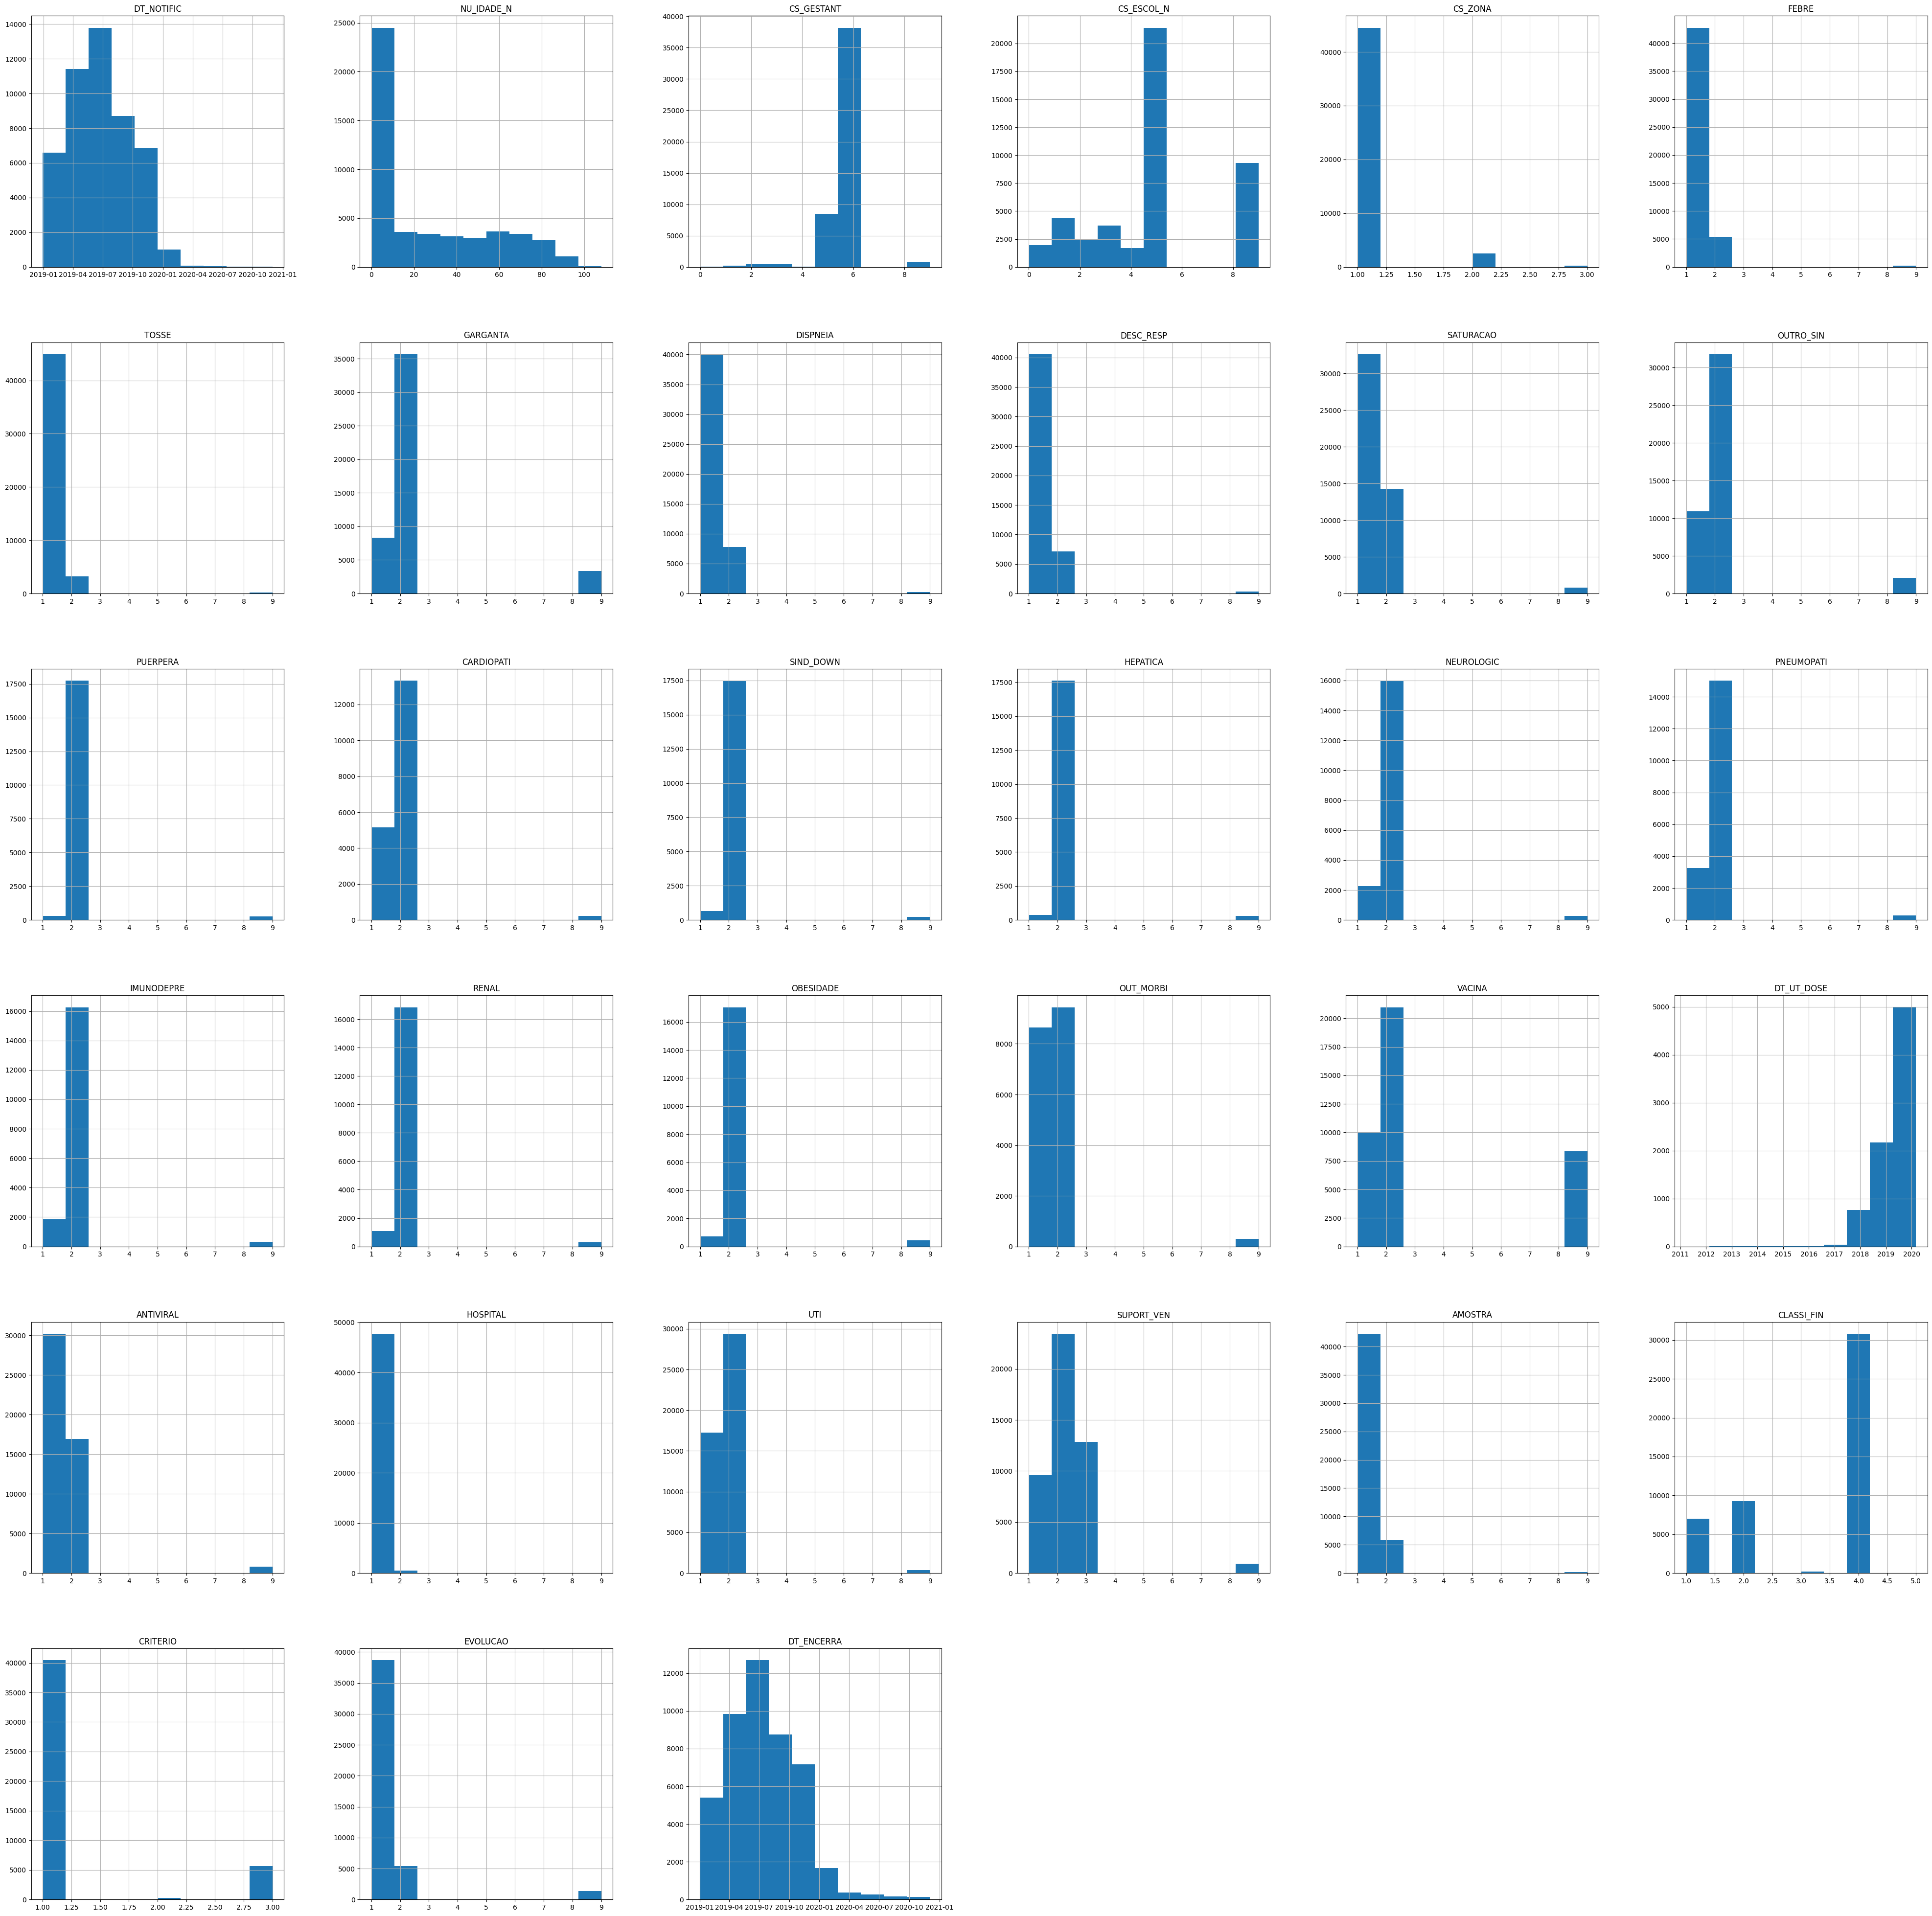

In [ ]:
# Histograma
ds_srag_2019.hist(figsize = (50,50))
plt.show()

Nos histogramas acima é possível observar os seguintes pontos:

Novamente verificamos que o atributo DT_NOTIFIC possui alguns registros que não deveriam estar nesse dataset pois são de 2018 e 2020.

Também conseguimos observar que os atributos CS_GESTANT e CS_ESCOL_N possuem alguns registros com categorias que não são esperadas pelo dicionário de dados e serão tratadas no pré-processamento de dados.

O atributo CLASS_FIN está muito desbalanceado e isso pode gerar problemas quando formos treinar o modelo.

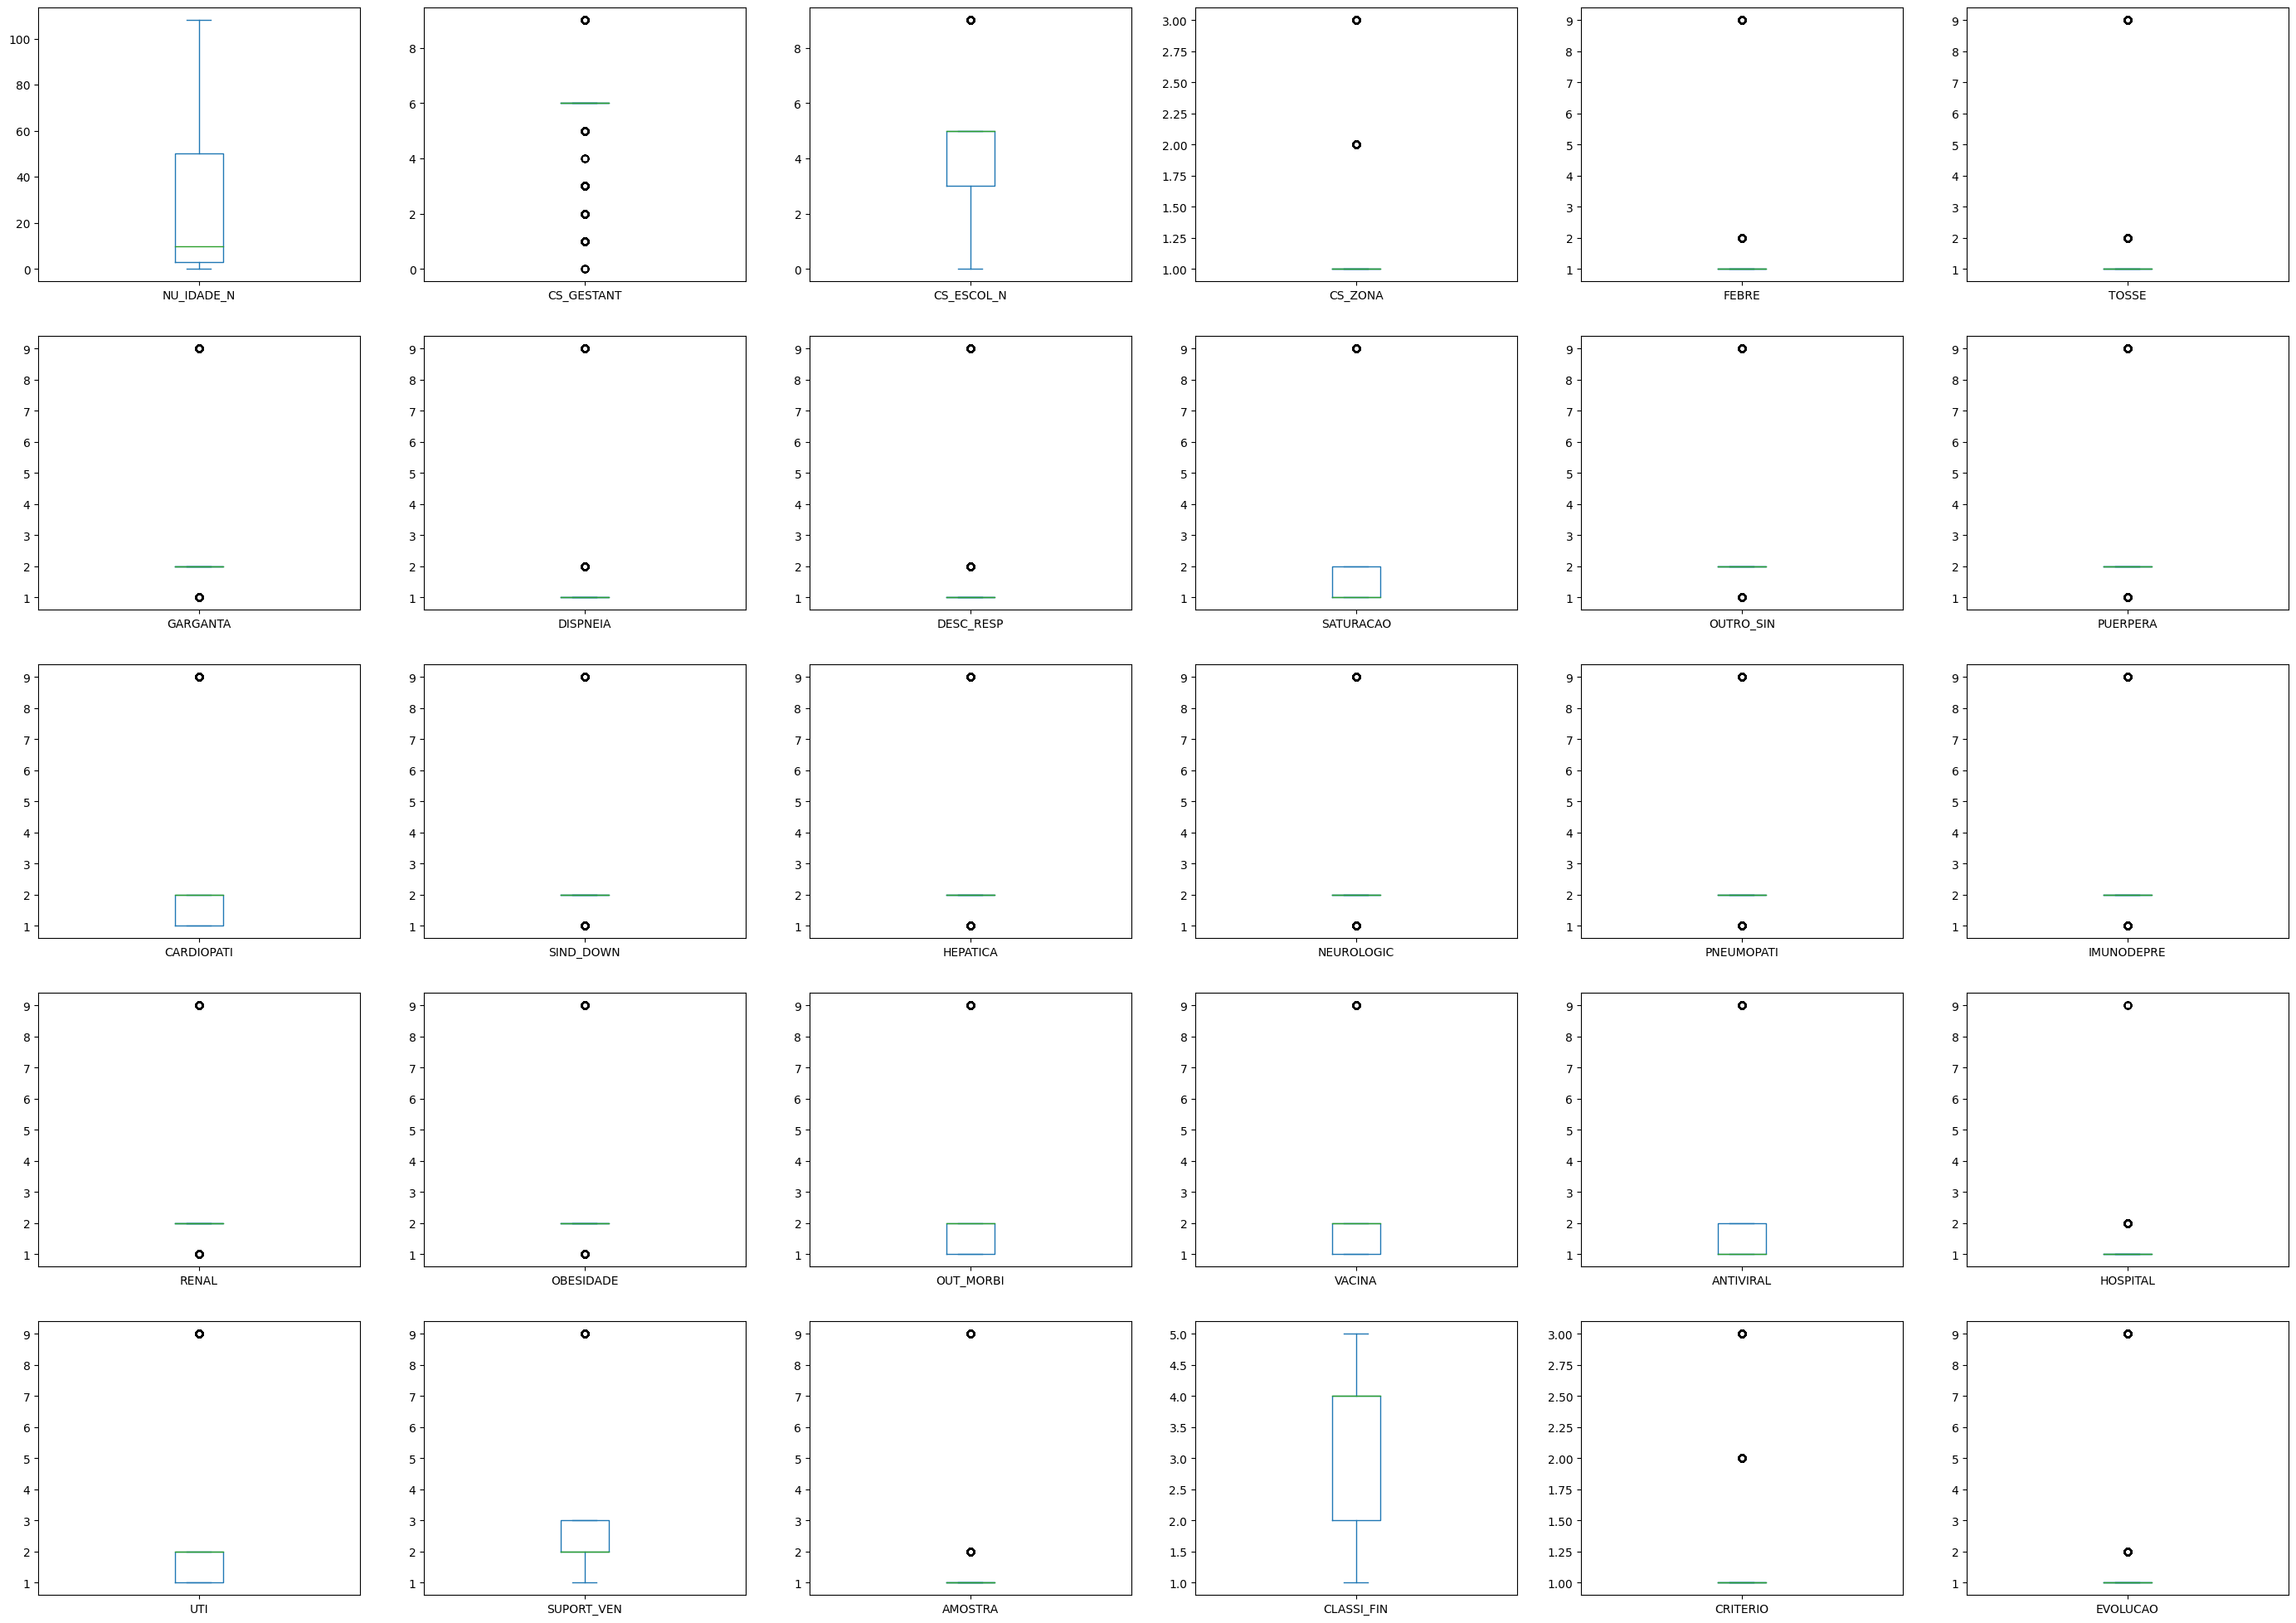

In [ ]:
# Boxplot
ds_srag_2019.plot(kind = 'box', layout=(6,6), subplots = True, sharex = False,
    sharey = False, figsize = (35,30))
plt.show()

Nos boxplots acima apenas o atributo NU_IDADE_N não é um atributo nominal categórico e é possível reparar que a mediana das notificações de SRAG de 2019 foram em pessoas entre 1 e 20 anos.

#### 4.3. Visualizações Multimodais

Vamos agora verificar a covariância entre as variáveis numéricas do dataset. A **covariância** representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:
* Próximo de -1 : há uma correlação negativa entre as variáveis,
* Próximo de +1: há uma correlação positiva entre as variáveis.
* 0: não há correlação entre as variáveis.

<i>OBS: Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documentação do algoritmo para verificar se algum tipo de tratamento de dataset é necessário.</i>

O código a seguir exibe a correlação de Person e na sequência exibimos a correlação utilizando um gráfico de heatmap.

In [ ]:
# Correlação de Pearson
ds_srag_2019.corr(method = 'pearson')

,NU_IDADE_N,CS_GESTANT,CS_ESCOL_N,CS_ZONA,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,OUTRO_SIN,PUERPERA,CARDIOPATI,SIND_DOWN,HEPATICA,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA,ANTIVIRAL,HOSPITAL,UTI,SUPORT_VEN,AMOSTRA,CLASSI_FIN,CRITERIO,EVOLUCAO
NU_IDADE_N,1.000000,-0.169384,0.075768,-0.013553,0.117600,0.069105,-0.102425,-0.038997,0.053566,-0.014149,0.032431,0.030946,-0.175914,0.057265,0.010563,0.053312,-0.055082,0.007037,-0.017675,0.028719,0.109908,0.089431,-0.046896,0.012199,-0.064375,-0.032984,0.001496,0.038608,-0.001632,0.046985
CS_GESTANT,-0.169384,1.000000,0.077570,0.003591,0.001796,0.004561,0.076233,0.019933,0.006305,-0.019175,0.023920,0.061533,0.020527,0.020577,0.036495,0.012994,0.023548,0.030716,0.038776,0.039426,0.038406,0.045868,0.043016,0.001036,0.006571,-0.021499,0.028087,0.007678,0.027762,0.023591
CS_ESCOL_N,0.075768,0.077570,1.000000,-0.047366,0.064317,0.058781,0.061367,0.032201,0.044690,-0.013697,0.054714,0.028999,0.008825,0.040025,0.050658,0.046546,0.021697,0.042103,0.045588,0.056411,0.040063,0.226471,0.036369,0.005646,-0.049758,-0.002688,0.052377,0.010009,0.066873,0.037398
CS_ZONA,-0.013553,0.003591,-0.047366,1.000000,-0.010522,0.000457,0.014290,-0.011793,-0.012897,0.017962,-0.010963,-0.002375,0.015357,0.003276,0.003659,-0.002833,0.005436,0.004180,0.004471,-0.010227,-0.018658,-0.019368,-0.002434,-0.003464,0.018743,-0.013269,0.020840,0.001341,0.028153,0.013320
FEBRE,0.117600,0.001796,0.064317,-0.010522,1.000000,0.234898,0.103628,0.076493,0.081506,0.031789,0.100000,0.144467,0.077402,0.140595,0.139474,0.126291,0.078913,0.127535,0.129531,0.111126,0.086910,0.078959,0.035986,0.017304,-0.042527,-0.018982,0.022206,0.045516,0.007238,0.025242
TOSSE,0.069105,0.004561,0.058781,0.000457,0.234898,1.000000,0.131120,0.129772,0.078848,0.058833,0.079025,0.071768,0.070812,0.078031,0.102170,0.079050,0.115455,0.092175,0.091287,0.098867,0.068201,0.103131,0.060146,0.014343,-0.044373,-0.043306,0.001137,0.035588,-0.010122,0.033201
GARGANTA,-0.102425,0.076233,0.061367,0.014290,0.103628,0.131120,1.000000,0.116726,0.123871,0.085419,0.221560,0.135458,0.134337,0.136930,0.172755,0.135349,0.138132,0.167047,0.158358,0.136956,0.060398,0.103498,0.034184,0.002437,-0.044603,-0.037676,0.006792,-0.015409,-0.006577,0.036278
DISPNEIA,-0.038997,0.019933,0.032201,-0.011793,0.076493,0.129772,0.116726,1.000000,0.253002,0.225121,0.121014,0.108609,0.092722,0.094264,0.100772,0.084175,0.112539,0.092038,0.083956,0.083335,0.047396,0.054058,0.016691,0.029906,0.037207,0.081792,0.017631,-0.036328,-0.002166,-0.011180
DESC_RESP,0.053566,0.006305,0.044690,-0.012897,0.081506,0.078848,0.123871,0.253002,1.000000,0.276382,0.119171,0.119675,0.097586,0.120483,0.124785,0.097558,0.103747,0.106776,0.109360,0.087936,0.052400,0.063113,0.054008,0.034070,0.053370,0.110164,0.068209,-0.017603,0.065428,0.014287
SATURACAO,-0.014149,-0.019175,-0.013697,0.017962,0.031789,0.058833,0.085419,0.225121,0.276382,1.000000,0.139410,0.100273,0.089341,0.103379,0.106623,0.107766,0.113683,0.105544,0.096168,0.102343,0.057107,0.021640,0.058211,0.037485,0.097553,0.159309,0.048635,-0.002122,0.036033,0.001342


<Axes: >

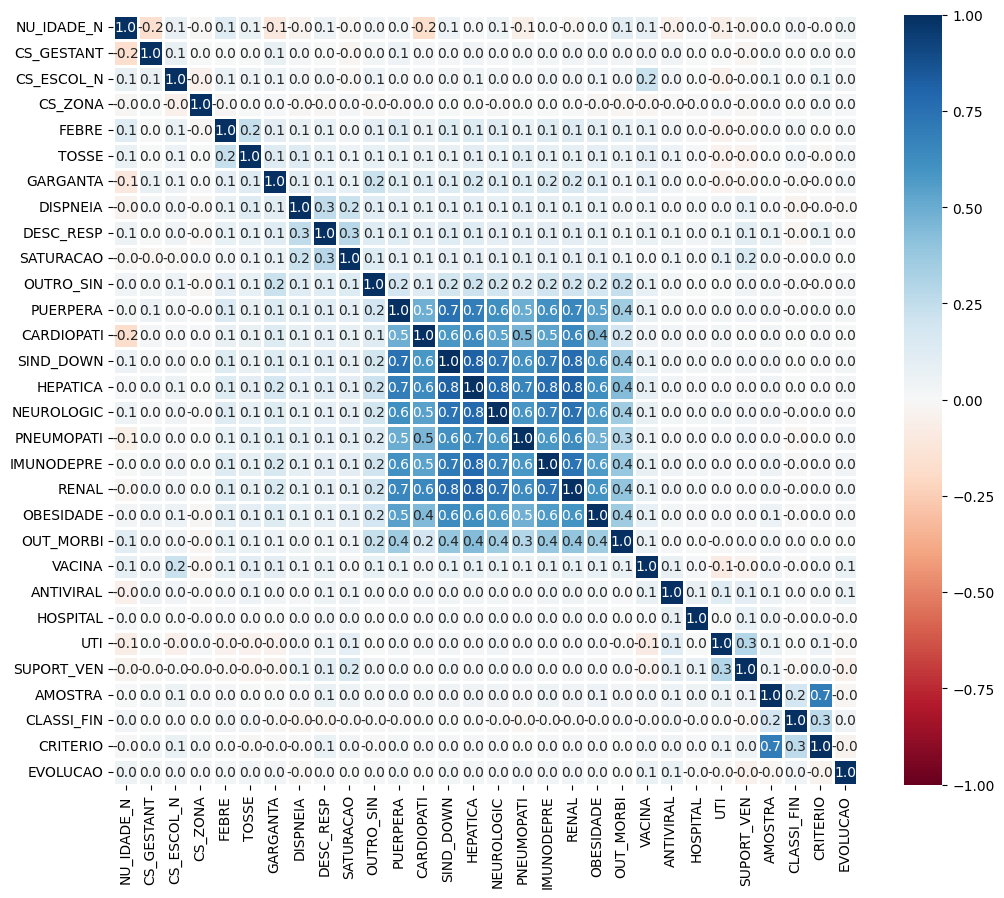

In [ ]:
# Matriz de Correlação com Matplotlib Seaborn
plt.figure(figsize = (12,10))
sns.heatmap(ds_srag_2019.corr(), annot=True, fmt=".1f", cmap='RdBu',
    linewidths=1, xticklabels=1, yticklabels=1, vmin=-1, vmax=1)

Podemos observar por exemplo na matriz acima que os atributos RENAL x SIND_DOWN, RENAL x HEPATICA, IMUNODEPRE x HEPATICA, NEUROLOGIC x HEPATICA e HEPATICA x SIND_DOWN possuem uma alta correlação.

### 5. Pré-Processamento de dados

#### 5.1. Cópia do dataset

Antes de iniciarmos as limpezas e tratamentos de dados, iremos fazer uma cópia do dataset para não perdermos os dados originais.

No código abaixo estamos copiando os dados do nosso dataset (ds_srag_2019) para um novo dataset (ds_srag_2019_new) que irá receber alguns tratamentos e limpezas.

In [ ]:
# Salvando um NOVO dataset para tratamento de missings e limpeza

# Recuperando os nomes das colunas
col = list(ds_srag_2019.columns)

# Novo dataset contendo todas as colunas do dataset ds_srag_2019
ds_srag_2019_new = ds_srag_2019[col[:]]

#### 5.2. Tratamento de Missings e Limpeza

Nesta etapa, iremos realizar as operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras.

##### 5.2.1. Tratamento do atributo DT_NOTIFIC

Na análise dos dados foram encontrados alguns registros que não fazem parte desse dataset, pois a data de notificação são de 2018 e 2020.

No código abaixo iremos retirar esses registros do dataset.

In [ ]:
# Identificar e excluir os registros fora de 2019 no atributo DT_NOTIFIC
a = 0
for i in range(len(ds_srag_2019_new)):
  if ds_srag_2019_new['DT_NOTIFIC'][i] < dt.datetime(2019, 1, 1) or \
  ds_srag_2019_new['DT_NOTIFIC'][i] > dt.datetime(2019, 12, 31):
    a = a + 1
    ds_srag_2019_new.drop([i], inplace=True)

print("Quantidade de registros excluídos: ", a)

# Reindexação do dataset após exclusão de registros
ds_srag_2019_new.reset_index(drop=True, inplace=True)

Quantidade de registros excluídos:  267


No código acima retiramos 267 registros que estavam com o atributo DT_NOTIFIC em 2018 e 2020.

##### 5.2.2. Tratamento do atributo CS_GESTANT

Na análise de dados identificamos que o atributo CS_GESTANT, que é um atributo nominal categórico, possui alguns valores que não condizem com o dicionário de dados.

No código abaixo iremos alterar esses valores para o valor 6 que é referente a "Não se aplica" conforme o dicionário de dados.

In [ ]:
# Identificar e corrigir os valores não esperados para o atributo CS_GESTANT
a = 0
for i in range(len(ds_srag_2019_new)):
  if ds_srag_2019_new['CS_GESTANT'][i] not in [1, 2, 3, 4, 5, 6]:
    a = a + 1
    ds_srag_2019_new['CS_GESTANT'][i] = 6

print("Quantidade de registros ajustados: ", a)

# distribuição do atributo CS_GESTANT após o tratamento
ds_srag_2019_new.groupby('CS_GESTANT').size()

Quantidade de registros ajustados:  787


CS_GESTANT
1      182
2      456
3      431
4       18
5     8399
6    38775
dtype: int64

##### 5.2.3. Tratamento do atributo CS_ESCOL_N

Na análise de dados reparamos que o atributo CS_ESCOL_N, que é um atributo nominal categórico, também possui alguns valores que não condizem com o dicionário de dados.

No código abaixo iremos alterar esses valores de acordo com a regra do dicionário de dados:

- Iremos preencher com o valor "10 - Não se aplica" quando idade menor ou igual a 7 anos de idade.

- Quando a idade for maior que 7 anos, o atributo será preenchido com "9 - Ignorado".

In [ ]:
# Identificar e corrigir os valores não esperados do atributo CS_ESCOL_N
a = 0
for i in range(len(ds_srag_2019_new)):
  if ds_srag_2019_new['NU_IDADE_N'][i] <= 7 and \
  ds_srag_2019_new['CS_ESCOL_N'][i] not in [0, 1, 2, 3, 9, 10]:
    a = a + 1
    ds_srag_2019_new['CS_ESCOL_N'][i] = 10
  elif ds_srag_2019_new['NU_IDADE_N'][i] > 7 and \
  ds_srag_2019_new['CS_ESCOL_N'][i] not in [0, 1, 2, 3, 9, 10]:
    a = a + 1
    ds_srag_2019_new['CS_ESCOL_N'][i] = 9

print("Quantidade de registros ajustados: ", a)

# distribuição do atributo CS_GESTANT após o tratamento
ds_srag_2019_new.groupby('CS_ESCOL_N').size()

Quantidade de registros ajustados:  26638


CS_ESCOL_N
0.0      1933
1.0      4342
2.0      2427
3.0      3676
9.0     17738
10.0    18145
dtype: int64

##### 5.2.4. Tratamento do atributo CLASSI_FIN

Na análise de dados reparamos que o atributo CLASSI_FIN, possui registro que não condiz com o dicionário de dados e também vimos que exitem nulos

No código abaixo iremos remover esses registros para que tenhamos uma melhor aprendizado do modelo

In [ ]:
# Verificando o atributo CLASSI_FIN para identificar os valores não esperados e nulos e remove-los do dataset
a = 0
for i in range(len(ds_srag_2019_new)):
  if pd.isnull(ds_srag_2019_new['CLASSI_FIN'][i]) or \
  ds_srag_2019_new['CLASSI_FIN'][i] not in [1, 2, 3, 4]:
    a = a + 1
    ds_srag_2019_new.drop([i], inplace=True)

print("Quantidade de registros excluídos: ", a)

# Reindexação do dataset após exclusão de registros
ds_srag_2019_new.reset_index(drop=True, inplace=True)

Quantidade de registros excluídos:  1236


##### 5.2.5. Guardando um novo dataset para retirada dos missings

Iremos fazer uma cópia do dataset tratado para um novo dataset onde iremos tratar os missings e retirada de algumas colunas.

In [ ]:
# Recuperando os nomes das colunas
col2 = list(ds_srag_2019_new.columns)

# Novo dataset contendo todas as colunas do dataset ds_srag_2019_new
ds_srag_2019_sem_missings = ds_srag_2019_new[col2[:]]

##### 5.2.6. Tratamento de missings

Nessa etapa iremos tratar os missings do Dataset.

In [ ]:
# verificando nulls no dataset
ds_srag_2019_sem_missings.isnull().sum()

DT_NOTIFIC        0
SG_UF_NOT         0
ID_MUNICIP        0
CS_SEXO           0
NU_IDADE_N        0
CS_GESTANT        0
CS_ESCOL_N        0
ID_PAIS           0
SG_UF            36
ID_MN_RESI       36
CS_ZONA        1167
FEBRE           154
TOSSE           180
GARGANTA       1088
DISPNEIA        371
DESC_RESP       423
SATURACAO       791
OUTRO_SIN      3609
PUERPERA      29290
CARDIOPATI    28870
SIND_DOWN     29197
HEPATICA      29308
NEUROLOGIC    29065
PNEUMOPATI    29037
IMUNODEPRE    29157
RENAL         29348
OBESIDADE     29341
OUT_MORBI     29174
VACINA         8872
DT_UT_DOSE    39263
ANTIVIRAL       607
HOSPITAL        236
UTI            1409
SUPORT_VEN     1625
AMOSTRA         146
CLASSI_FIN        0
CRITERIO        954
EVOLUCAO       1979
DT_ENCERRA      805
dtype: int64

Acima podemos reparar que diversos atributos possuem missings.

<Axes: >

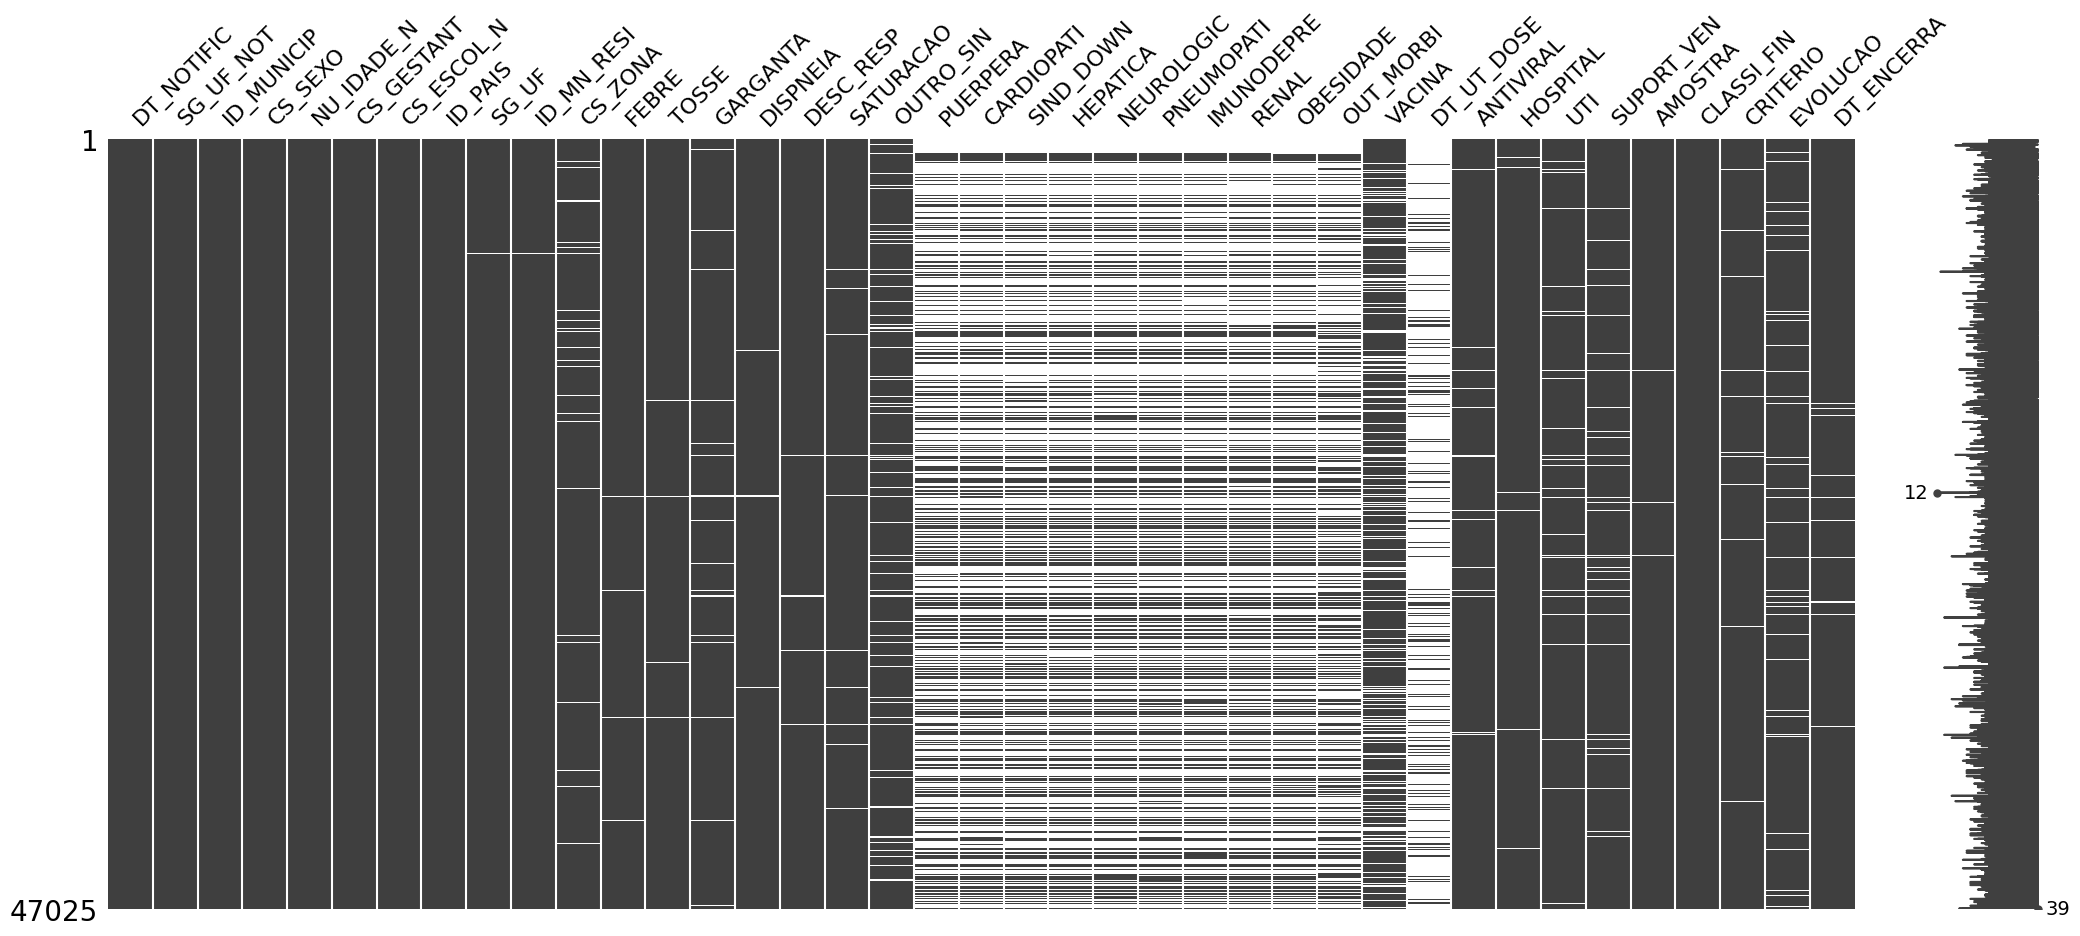

In [ ]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(ds_srag_2019_sem_missings)

Acima é exibida a visualização matricial com as nulidades do dataset. É possível reparar que temos muitos atributos com missings que precisam ser tratados.

No código abaixo iremos substituir todos os valores nulos (NaN) para o valor 9 que corresponde a "Ignorado" de alguns atributos, de acordo com o dicionário de dados.

<Axes: >

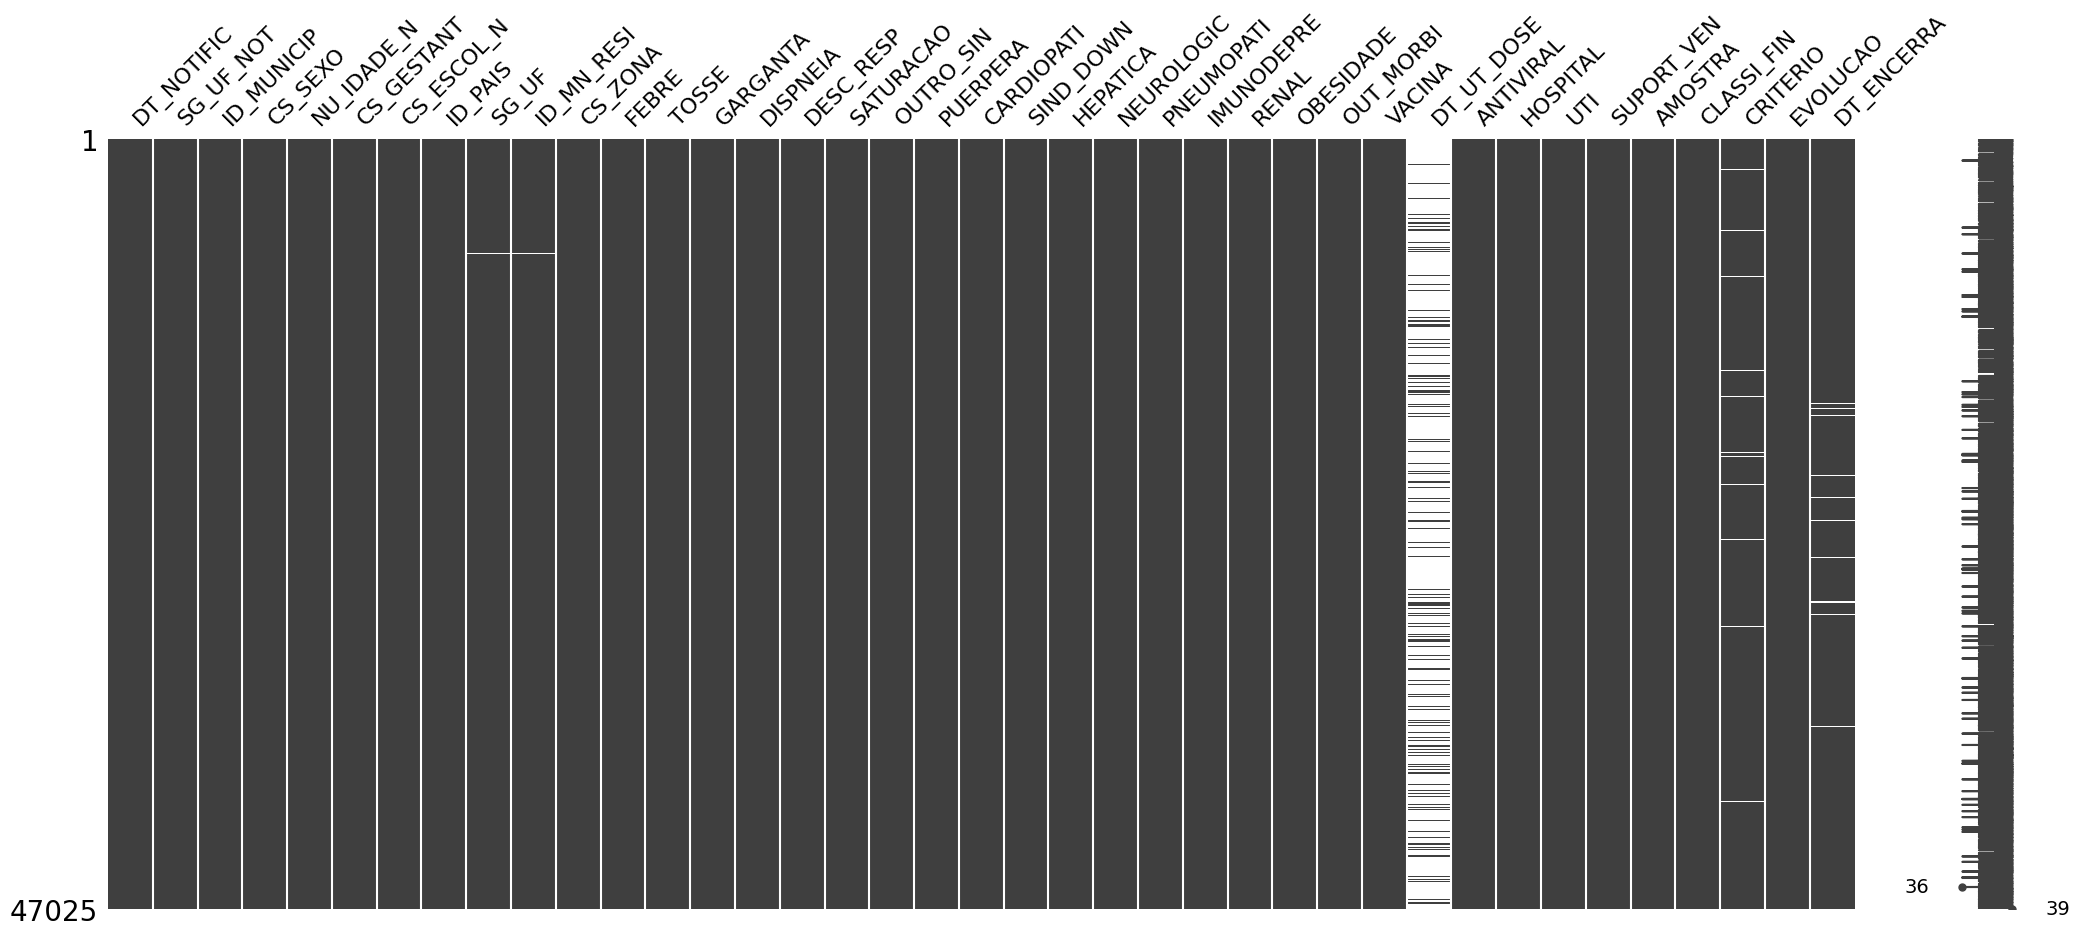

In [ ]:
# Substituindo os valores nulos (NaN) por 9 (Ignorado)
ds_srag_2019_sem_missings['CS_ZONA'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['FEBRE'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['TOSSE'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['GARGANTA'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['DISPNEIA'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['DESC_RESP'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['SATURACAO'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['OUTRO_SIN'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['PUERPERA'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['CARDIOPATI'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['SIND_DOWN'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['HEPATICA'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['NEUROLOGIC'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['PNEUMOPATI'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['IMUNODEPRE'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['RENAL'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['OBESIDADE'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['OUT_MORBI'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['VACINA'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['ANTIVIRAL'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['HOSPITAL'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['UTI'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['SUPORT_VEN'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['AMOSTRA'].replace(np.nan, 9, inplace=True)
ds_srag_2019_sem_missings['EVOLUCAO'].replace(np.nan, 9, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(ds_srag_2019_sem_missings)

Na visualização matricial acima verificamos que a maioria dos atributos foram tratados, porém ainda temos alguns missings que precisam ser tratados.

In [ ]:
# verificando nulls no dataset
ds_srag_2019_sem_missings.isnull().sum()

DT_NOTIFIC        0
SG_UF_NOT         0
ID_MUNICIP        0
CS_SEXO           0
NU_IDADE_N        0
CS_GESTANT        0
CS_ESCOL_N        0
ID_PAIS           0
SG_UF            36
ID_MN_RESI       36
CS_ZONA           0
FEBRE             0
TOSSE             0
GARGANTA          0
DISPNEIA          0
DESC_RESP         0
SATURACAO         0
OUTRO_SIN         0
PUERPERA          0
CARDIOPATI        0
SIND_DOWN         0
HEPATICA          0
NEUROLOGIC        0
PNEUMOPATI        0
IMUNODEPRE        0
RENAL             0
OBESIDADE         0
OUT_MORBI         0
VACINA            0
DT_UT_DOSE    39263
ANTIVIRAL         0
HOSPITAL          0
UTI               0
SUPORT_VEN        0
AMOSTRA           0
CLASSI_FIN        0
CRITERIO        954
EVOLUCAO          0
DT_ENCERRA      805
dtype: int64

Acima verificamos melhor a quantidade de missings que ainda temos nos atributos SG_UF, ID_MN_RESI, DT_UT_DOSE, CRITERIO e DT_ENCERRA.

##### 5.2.7. Remoçao de atributos

Não é possível o tratamento de alguns atributos a ponto de não termos nulos, nesse caso iremos remover os atributos abaixo, uma vez que eles não serão importantes no aprendizado do modelo nesse momento:

- SG_UF - Quando o atributo ID_PAIS é diferente de "BRASIL" esse atributo não é obrigatório.

- ID_MN_RESI - Quando o atributo ID_PAIS é diferente de "BRASIL" esse atributo não é obrigatório.

- DT_UT_DOSE - Essa informação não é obrigatória, pois o paciente pode não ter o comprovante da última vacinação, pode não se lembrar ou até mesmo nunca ter tomado alguma dose da vacina em questão.

- CRITERIO - Não foi possivel encontrar um padrão para preenchimento dos campos que estão nulos.

- DT_ENCERRA - A notificação ainda pode estar em andamento. Nesse caso não é obrigatório que o atributo DT_ENCERRA seja preenchido.

Temos também alguns outros atributos que não serão utilziados para o aprendizado do modelo e iremos retirá-los do dataset também:

- DT_NOTIFIC
- SG_UF_NOT
- ID_MUNICIP
- ID_PAIS
- CS_SEXO

<Axes: >

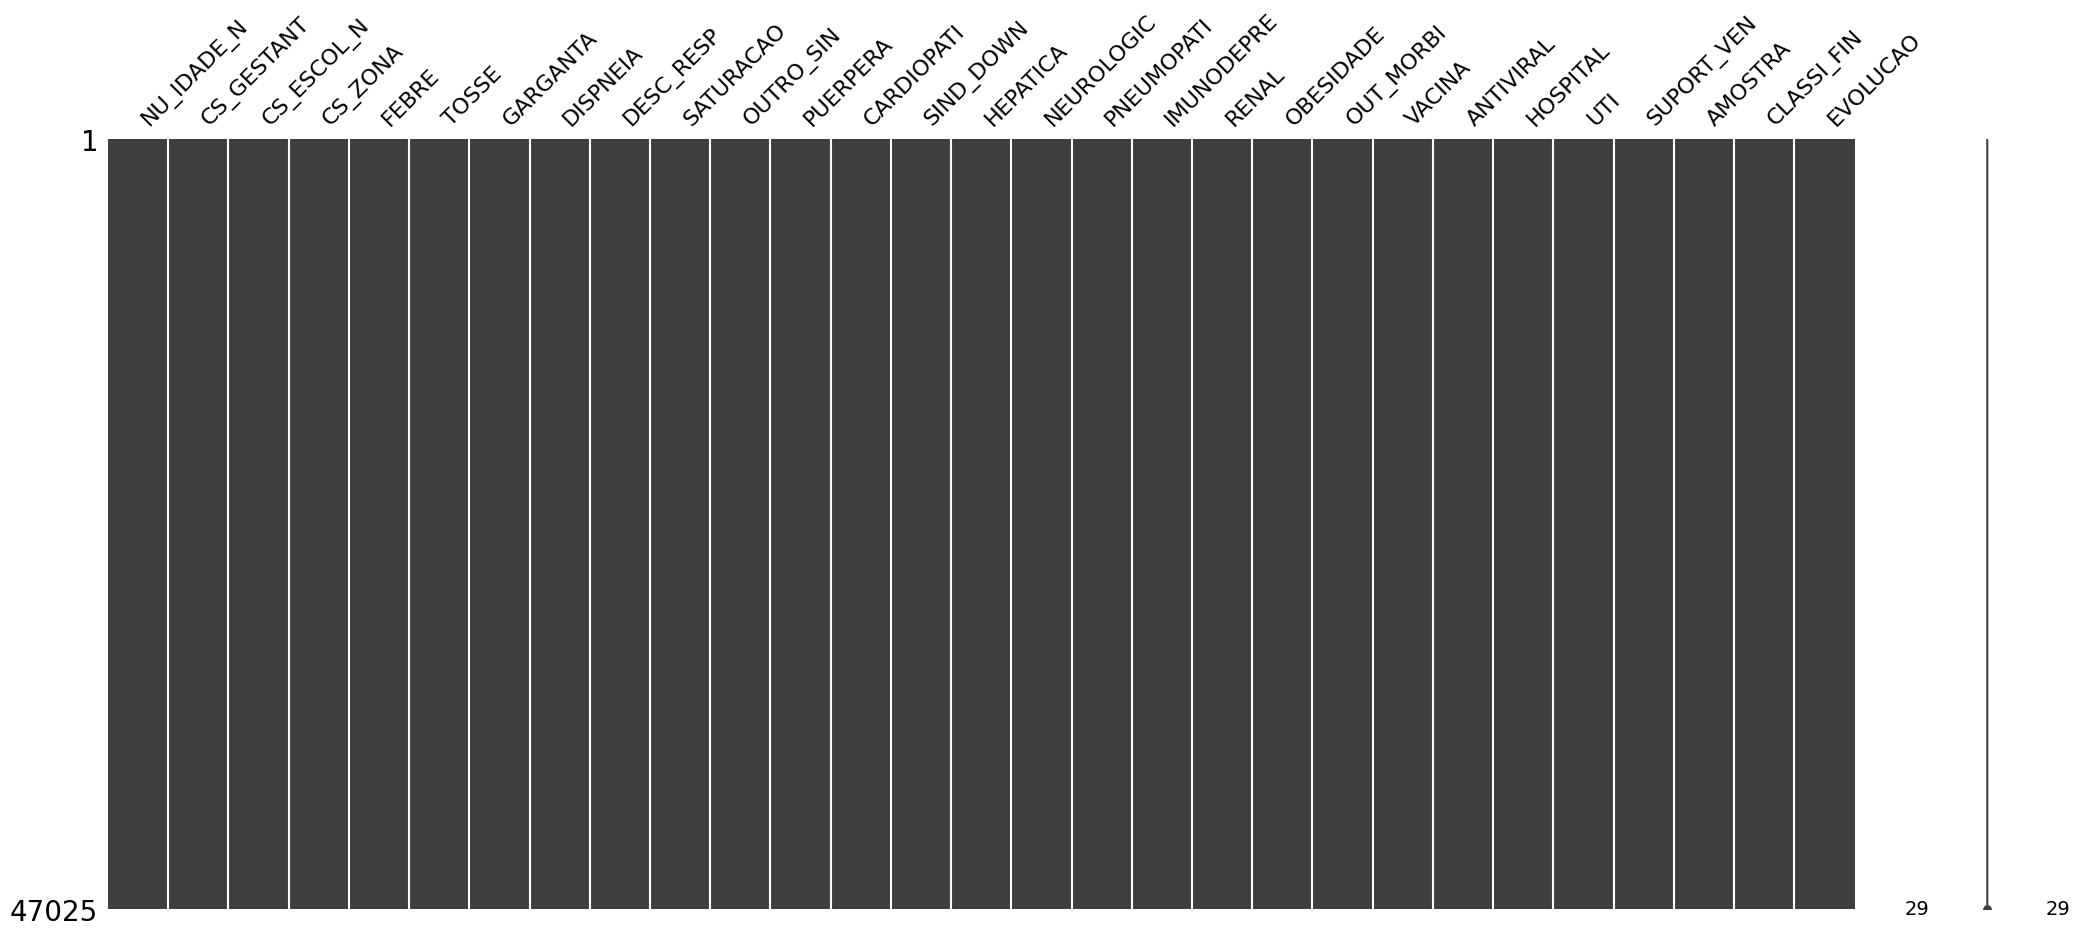

In [ ]:
# removendo colunas
ds_srag_2019_sem_missings.drop(['SG_UF', 'ID_MN_RESI', 'DT_UT_DOSE', 'CRITERIO',
    'DT_ENCERRA', 'DT_NOTIFIC', 'SG_UF_NOT', 'ID_MUNICIP', 'ID_PAIS',
    'CS_SEXO'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(ds_srag_2019_sem_missings)

In [ ]:
# verificando nulls no dataset
ds_srag_2019_sem_missings.isnull().sum()

NU_IDADE_N    0
CS_GESTANT    0
CS_ESCOL_N    0
CS_ZONA       0
FEBRE         0
TOSSE         0
GARGANTA      0
DISPNEIA      0
DESC_RESP     0
SATURACAO     0
OUTRO_SIN     0
PUERPERA      0
CARDIOPATI    0
SIND_DOWN     0
HEPATICA      0
NEUROLOGIC    0
PNEUMOPATI    0
IMUNODEPRE    0
RENAL         0
OBESIDADE     0
OUT_MORBI     0
VACINA        0
ANTIVIRAL     0
HOSPITAL      0
UTI           0
SUPORT_VEN    0
AMOSTRA       0
CLASSI_FIN    0
EVOLUCAO      0
dtype: int64

Nas duas visualizações acima podemos reparar que não temos mais missings para ser tratado.

##### 5.2.8. Movendo coluna target para o final do dataset

In [ ]:
ds_srag_2019_sem_missings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47025 entries, 0 to 47024
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NU_IDADE_N  47025 non-null  int64  
 1   CS_GESTANT  47025 non-null  int64  
 2   CS_ESCOL_N  47025 non-null  float64
 3   CS_ZONA     47025 non-null  float64
 4   FEBRE       47025 non-null  float64
 5   TOSSE       47025 non-null  float64
 6   GARGANTA    47025 non-null  float64
 7   DISPNEIA    47025 non-null  float64
 8   DESC_RESP   47025 non-null  float64
 9   SATURACAO   47025 non-null  float64
 10  OUTRO_SIN   47025 non-null  float64
 11  PUERPERA    47025 non-null  float64
 12  CARDIOPATI  47025 non-null  float64
 13  SIND_DOWN   47025 non-null  float64
 14  HEPATICA    47025 non-null  float64
 15  NEUROLOGIC  47025 non-null  float64
 16  PNEUMOPATI  47025 non-null  float64
 17  IMUNODEPRE  47025 non-null  float64
 18  RENAL       47025 non-null  float64
 19  OBESIDADE   47025 non-nul

In [ ]:
column_target = ds_srag_2019_sem_missings.pop("CLASSI_FIN")
ds_srag_2019_sem_missings.insert(28, "CLASSI_FIN", column_target)

In [ ]:
ds_srag_2019_sem_missings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47025 entries, 0 to 47024
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NU_IDADE_N  47025 non-null  int64  
 1   CS_GESTANT  47025 non-null  int64  
 2   CS_ESCOL_N  47025 non-null  float64
 3   CS_ZONA     47025 non-null  float64
 4   FEBRE       47025 non-null  float64
 5   TOSSE       47025 non-null  float64
 6   GARGANTA    47025 non-null  float64
 7   DISPNEIA    47025 non-null  float64
 8   DESC_RESP   47025 non-null  float64
 9   SATURACAO   47025 non-null  float64
 10  OUTRO_SIN   47025 non-null  float64
 11  PUERPERA    47025 non-null  float64
 12  CARDIOPATI  47025 non-null  float64
 13  SIND_DOWN   47025 non-null  float64
 14  HEPATICA    47025 non-null  float64
 15  NEUROLOGIC  47025 non-null  float64
 16  PNEUMOPATI  47025 non-null  float64
 17  IMUNODEPRE  47025 non-null  float64
 18  RENAL       47025 non-null  float64
 19  OBESIDADE   47025 non-nul

### 6. Preparação de dados

#### 6.1. Separando dados para treino e teste e criando folds para validação cruzada

Nessa etapa iremos setar alguns parâmetro como por exemplo o tamanho do dataset que iremos separar para teste e treino e seed. Além disso iremos também separa o conjunto de dados entre treino e teste para o dataset tratado até o momento, chamado de "ds_srag_2019_sem_missings"

In [ ]:
# setando parâmetros
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset sem missings)
array = ds_srag_2019_sem_missings.values
X_sm = array[:,0:28]
y_sm = array[:,28]

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed) # faz o particionamento em 10 folds

#### 6.2. Escolhendo o melhor feature selection

Abaixo iremos testar o treinamento do modelo sem features selection e com algumas opções de features selection para verificar qual irá possuir o melhor desempenho.

Iremos utilizar o selectKBest, Elimininação recursiva e ExtraTrees.

##### 6.2.1 Sem Feature selection

In [ ]:
# Separação em conjuntos de treino e teste (dataset sem missings)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, random_state=seed, shuffle=True, stratify=y_sm)

KNN: 0.585433 (0.006563)
CART: 0.552871 (0.006969)
NB: 0.437347 (0.012797)
SVM: 0.651489 (0.006572)
Algorithm evaluation time: 22.18 mins


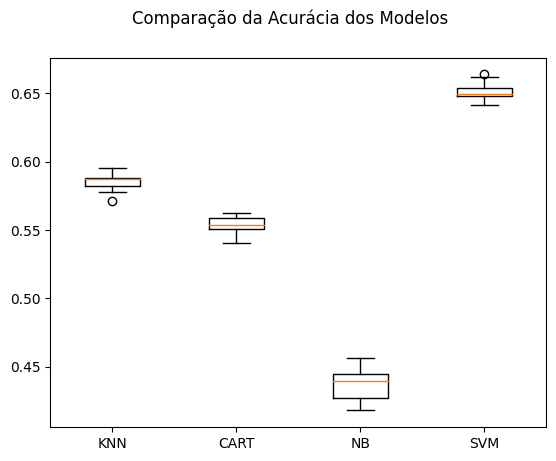

In [ ]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
t = time()
for name, model in models:
  cv_results = cross_val_score(model, X_train_sm, y_train_sm, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

print('Algorithm evaluation time: {} mins'.format(round((time() - t) / 60, 2)))

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### 6.2.2 selectKBest

Abaixo iremos "configurar" o algoritmo para trabalhar com os 4 principais atributos.

OBS: Anteriormente testamos também com 6, 8 e 12 principais atributos, porém não tivemos ganhos consideráveis.

In [ ]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit_1 = best_var.fit(X_sm, y_sm)

# Reduz X para os atributos selecionados
features = fit_1.transform(X_sm)

# Resultados
print('\nNúmero original de atributos:', X_sm.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", ds_srag_2019_sem_missings.columns[0:28])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit_1.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=ds_srag_2019_sem_missings.columns[0:28]))


Número original de atributos: 28

Número reduzido de atributos: 4

Atributos Originais: Index(['NU_IDADE_N', 'CS_GESTANT', 'CS_ESCOL_N', 'CS_ZONA', 'FEBRE', 'TOSSE',
       'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'OUTRO_SIN',
       'PUERPERA', 'CARDIOPATI', 'SIND_DOWN', 'HEPATICA', 'NEUROLOGIC',
       'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI', 'VACINA',
       'ANTIVIRAL', 'HOSPITAL', 'UTI', 'SUPORT_VEN', 'AMOSTRA', 'EVOLUCAO'],
      dtype='object')

Scores dos Atributos Originais: [1299.182  363.099  534.285    5.019   23.499   27.715   85.465   25.461
   43.374   34.399    8.533  165.778  195.168  163.146  170.134  165.577
  174.069  177.94   171.61   162.116  111.713  121.761   35.843    6.416
   24.972   49.265  398.81    40.737]

Atributos Selecionados: ['NU_IDADE_N' 'CS_GESTANT' 'CS_ESCOL_N' 'AMOSTRA']


In [ ]:
# Recuperando os nomes das colunas
col3 = list(ds_srag_2019_sem_missings.columns)

# Criando novo dataset para testarmos o selectKBest
ds_selectKBest = ds_srag_2019_sem_missings[col3[:]]

# Excluindo os atributos do novo dataset para testar o selectKBest
ds_selectKBest.drop(['CS_ZONA', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA',
                     'DESC_RESP', 'SATURACAO', 'OUTRO_SIN', 'PUERPERA',
                     'CARDIOPATI', 'SIND_DOWN', 'HEPATICA', 'NEUROLOGIC',
                     'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE',
                     'OUT_MORBI', 'VACINA', 'ANTIVIRAL', 'HOSPITAL', 'UTI',
                     'SUPORT_VEN', 'EVOLUCAO'], axis=1, inplace= True)

In [ ]:
# Separação em conjuntos de treino e teste (dataset selectKBest)
array_1 = ds_selectKBest.values
X_selectKBest = array_1[:,0:4]
y_selectKBest = array_1[:,4]

X_train_selectKBest, X_test_selectKBest, y_train_selectKBest, y_test_selectKBest = train_test_split(X_selectKBest, y_selectKBest,
    test_size=test_size, random_state=seed, shuffle=True, stratify=y_selectKBest)

KNN: 0.552897 (0.017469)
CART: 0.639660 (0.006508)
NB: 0.531287 (0.008835)
SVM: 0.651489 (0.006572)
Algorithm evaluation time: 6.05 mins


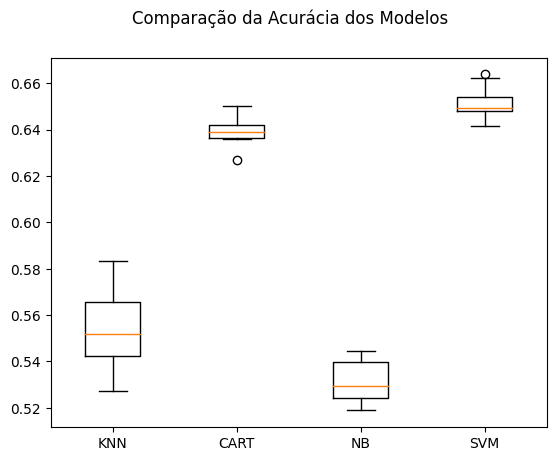

In [ ]:
# Modelagem para o selectKBest

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
t = time()
for name, model in models:
  cv_results = cross_val_score(model, X_train_selectKBest, y_train_selectKBest, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

print('Algorithm evaluation time: {} mins'.format(round((time() - t) / 60, 2)))

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### 6.2.3 Eliminação Recursiva

Abaixo iremos "configurar" o algoritmo para trabalhar com os 4 principais atributos.

OBS: Anteriormente testamos também com 6, 8 e 12 principais atributos, porém não tivemos ganhos consideráveis.

In [ ]:
# Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=4)
fit_2 = rfe.fit(X_sm, y_sm)

# Print dos resultados
print("Atributos Originais:", ds_srag_2019_sem_missings.columns[0:28])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit_2.support_)
print("\nRanking de atributos: %s" % fit_2.ranking_)
print("\nQtd de melhores Atributos: %d" % fit_2.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit_2.get_feature_names_out(input_features=ds_srag_2019_sem_missings.columns[0:28]))

Atributos Originais: Index(['NU_IDADE_N', 'CS_GESTANT', 'CS_ESCOL_N', 'CS_ZONA', 'FEBRE', 'TOSSE',
       'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'OUTRO_SIN',
       'PUERPERA', 'CARDIOPATI', 'SIND_DOWN', 'HEPATICA', 'NEUROLOGIC',
       'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI', 'VACINA',
       'ANTIVIRAL', 'HOSPITAL', 'UTI', 'SUPORT_VEN', 'AMOSTRA', 'EVOLUCAO'],
      dtype='object')

Atributos Selecionados: [False  True False False False  True False False  True False False False
 False False False False False False False False False False False False
 False False  True False]

Ranking de atributos: [22  1 10 19  6  1 17  9  1 16 20  5  3 25  4  8 14  7 18 24 23 21 12  2
 11 13  1 15]

Qtd de melhores Atributos: 4

Nomes dos Atributos Selecionados: ['CS_GESTANT' 'TOSSE' 'DESC_RESP' 'AMOSTRA']


In [ ]:
# Recuperando os nomes das colunas
col4 = list(ds_srag_2019_sem_missings.columns)

# Criando novo dataset para testarmos o RFE
ds_rfe = ds_srag_2019_sem_missings[col4[:]]

# Excluindo os atributos do novo dataset para testar o RFE
ds_rfe.drop(['NU_IDADE_N', 'CS_ESCOL_N', 'CS_ZONA', 'FEBRE', 'GARGANTA',
             'DISPNEIA', 'SATURACAO', 'OUTRO_SIN', 'PUERPERA', 'CARDIOPATI',
             'SIND_DOWN', 'HEPATICA', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE',
             'RENAL', 'OBESIDADE', 'OUT_MORBI', 'VACINA', 'ANTIVIRAL',
             'HOSPITAL', 'UTI', 'SUPORT_VEN', 'EVOLUCAO'], axis=1, inplace= True)

In [ ]:
# Separação em conjuntos de treino e teste (dataset RFE)
array_2 = ds_rfe.values
X_rfe = array_2[:,0:4]
y_rfe = array_2[:,4]

X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y_rfe,
    test_size=test_size, random_state=seed, shuffle=True, stratify=y_rfe)

KNN: 0.582111 (0.101762)
CART: 0.651249 (0.006724)
NB: 0.429346 (0.014068)
SVM: 0.651489 (0.006572)
Algorithm evaluation time: 6.37 mins


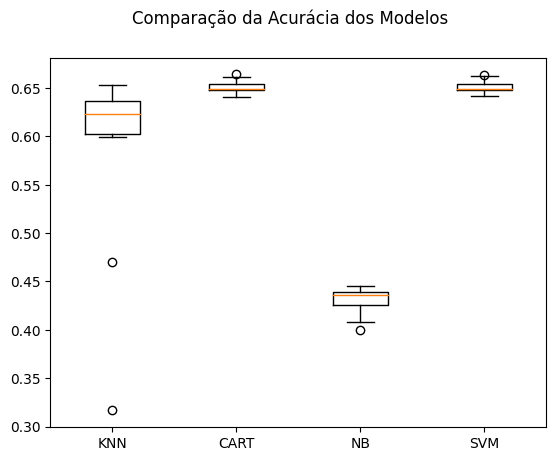

In [ ]:
# Modelagem para o RFE

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
t = time()
for name, model in models:
  cv_results = cross_val_score(model, X_train_rfe, y_train_rfe, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

print('Algorithm evaluation time: {} mins'.format(round((time() - t) / 60, 2)))

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### 6.2.4 ExtraTrees

Abaixo iremos "configurar" o algoritmo para trabalhar com 200 estimators.

OBS: Testamos anteriormente com 100, 300 e 400 e não tivemos grandes ganhos.

In [ ]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=200)
modelo.fit(X_sm, y_sm)

# Exibe os atributos orginais
print("\nAtributos Originais:", ds_srag_2019_sem_missings.columns[0:28])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)


Atributos Originais: Index(['NU_IDADE_N', 'CS_GESTANT', 'CS_ESCOL_N', 'CS_ZONA', 'FEBRE', 'TOSSE',
       'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'OUTRO_SIN',
       'PUERPERA', 'CARDIOPATI', 'SIND_DOWN', 'HEPATICA', 'NEUROLOGIC',
       'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI', 'VACINA',
       'ANTIVIRAL', 'HOSPITAL', 'UTI', 'SUPORT_VEN', 'AMOSTRA', 'EVOLUCAO'],
      dtype='object')
[0.239 0.028 0.05  0.033 0.025 0.018 0.038 0.035 0.03  0.045 0.052 0.005
 0.016 0.006 0.005 0.013 0.014 0.011 0.009 0.007 0.025 0.039 0.048 0.005
 0.046 0.071 0.057 0.03 ]


In [ ]:
# Recuperando os nomes das colunas
col5 = list(ds_srag_2019_sem_missings.columns)

# Criando novo dataset para testarmos o ExtraTrees
ds_extra_trees = ds_srag_2019_sem_missings[col5[:]]

# Excluindo os atributos do novo dataset para testar o ExtraTrees
ds_extra_trees.drop(['CS_GESTANT', 'CS_ESCOL_N', 'CS_ZONA', 'FEBRE', 'TOSSE',
                     'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO',
                     'PUERPERA', 'CARDIOPATI', 'SIND_DOWN', 'HEPATICA',
                     'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL',
                     'OBESIDADE', 'OUT_MORBI', 'VACINA', 'ANTIVIRAL', 'HOSPITAL',
                     'UTI', 'EVOLUCAO'], axis=1, inplace= True)

In [ ]:
# Separação em conjuntos de treino e teste (dataset ExtraTrees)
array = ds_extra_trees.values
X_extra_trees = array[:,0:4]
y_extra_trees = array[:,4]

X_train_extra_trees, X_test_extra_trees, y_train_extra_trees, y_test_extra_trees = train_test_split(X_extra_trees, y_extra_trees,
    test_size=test_size, random_state=seed, shuffle=True, stratify=y_extra_trees)

KNN: 0.551223 (0.009409)
CART: 0.635726 (0.007641)
NB: 0.513025 (0.007530)
SVM: 0.651489 (0.006572)
Algorithm evaluation time: 6.02 mins


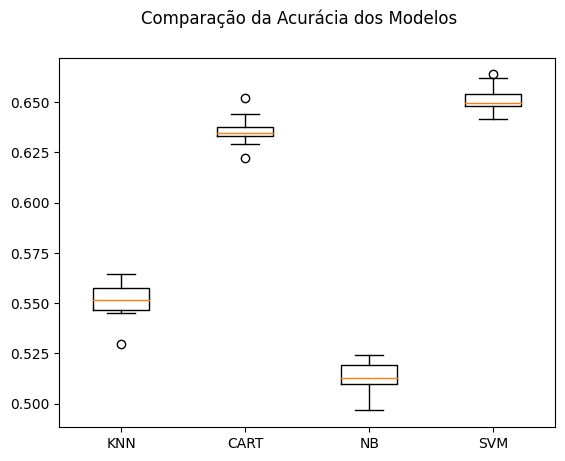

In [ ]:
# Modelagem para o ExtraTrees

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
t = time()
for name, model in models:
  cv_results = cross_val_score(model, X_train_extra_trees, y_train_extra_trees, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

print('Algorithm evaluation time: {} mins'.format(round((time() - t) / 60, 2)))

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### 6.2.5 Melhor escolha

Nos testes realizado com os três tipos de features selection acima, o algoritmo SVM teve o melhor desempenho, inclusive quando não aplicado o feature selection.

Veja o resumo abaixo:

-- Sem feature selection:
> KNN: 0.586071 (0.005498)<br>
> CART: 0.552871 (0.006969)<br>
> NB: 0.437347 (0.012797)<br>
> SVM: 0.651489 (0.006572)<br>

-- selectKBest
> KNN: 0.552897 (0.017469)<br>
> CART: 0.639660 (0.006508)<br>
> NB: 0.531287 (0.008835)<br>
> SVM: 0.651489 (0.006572)<br>

--Eliminação Recursiva
> KNN: 0.582111 (0.101762)<br>
> CART: 0.651249 (0.006724)<br>
> NB: 0.429346 (0.014068)<br>
> SVM: 0.651489 (0.006572)<br>

-- ExtraTrees
> KNN: 0.551223 (0.009409)<br>
> CART: 0.635726 (0.007641)<br>
> NB: 0.513025 (0.007530)<br>
> SVM: 0.651489 (0.006572)<br>

**Dada as opções acima, por hora iremos utilizar o algoritmo SVM com o feature selection de Eliminação recursiva. O uso de um feature selection irá fazer com que o modelo seja treinado mais rápido.**

### 7. Modelagem e treinamento

#### 7.1 Ajustes de hiperparâmetros

Abaixo iremos utilizar o GridSearch para verificar os melhores parâmetros para o modelo SVM.

In [ ]:
# Tuning do SVM

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
svm = ('SVM', SVC())


pipelines.append(('SVM', Pipeline(steps=[svm])))

param_grid = {
    'SVM__C': [0.1, 1, 100],
    'SVM__gamma': [1, 0.1, 0.0001],
    'SVM__kernel': ['rbf', 'sigmoid']
}

# Prepara e executa o GridSearchCV
t = time()
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
    grid.fit(X_train_rfe, y_train_rfe)
    # imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

print('Hyperparameter evaluation time: {} mins'.format(round((time() - t) / 60, 2)))


SVM - Melhor: 0.651489 usando {'SVM__C': 0.1, 'SVM__gamma': 1, 'SVM__kernel': 'rbf'}
Hyperparameter evaluation time: 121.93 mins


Acima verificamos os melhores hiperparâmetros para o modelo SVC com o feature selection de eliminação recursiva.

Verificamos o modelo com os seguintes ajustes:
- parâmetro C: 0.1, 1 e 100
- parâmetro gamma: 1, 0.1 e 0.0001
- parâmetro kernel: 'rbf' e 'sigmoid'

De acordo com o resultado acima, apesar do ajuste sugerido, não tivemos uma melhora no desempenho do SVM. De qualquer forma, iremos utilizar os parâmetros sugeridos na finalização do modelo.

#### 7.2 Criação e avaliação de modelos utilizando pipeline



OBS: Tendo em vista os dados que temos em nosso dataset (ds_rfe), não haverá a necessidade de normalização ou padronização.

Abaixo iremos testar o dataset com o feature selection de Eliminação recurssiva com outros algoritmos utilizando pipeline.

LR: 0.651 (0.007)
KNN: 0.582 (0.102)
CART: 0.651 (0.007)
NB: 0.429 (0.014)
SVM: 0.651 (0.007)
Bag: 0.651 (0.007)
RF: 0.651 (0.007)
ET: 0.651 (0.007)
Ada: 0.651 (0.007)
GB: 0.651 (0.007)
Vot: 0.652 (0.007)
Hyperparameter evaluation time: 14.64 mins


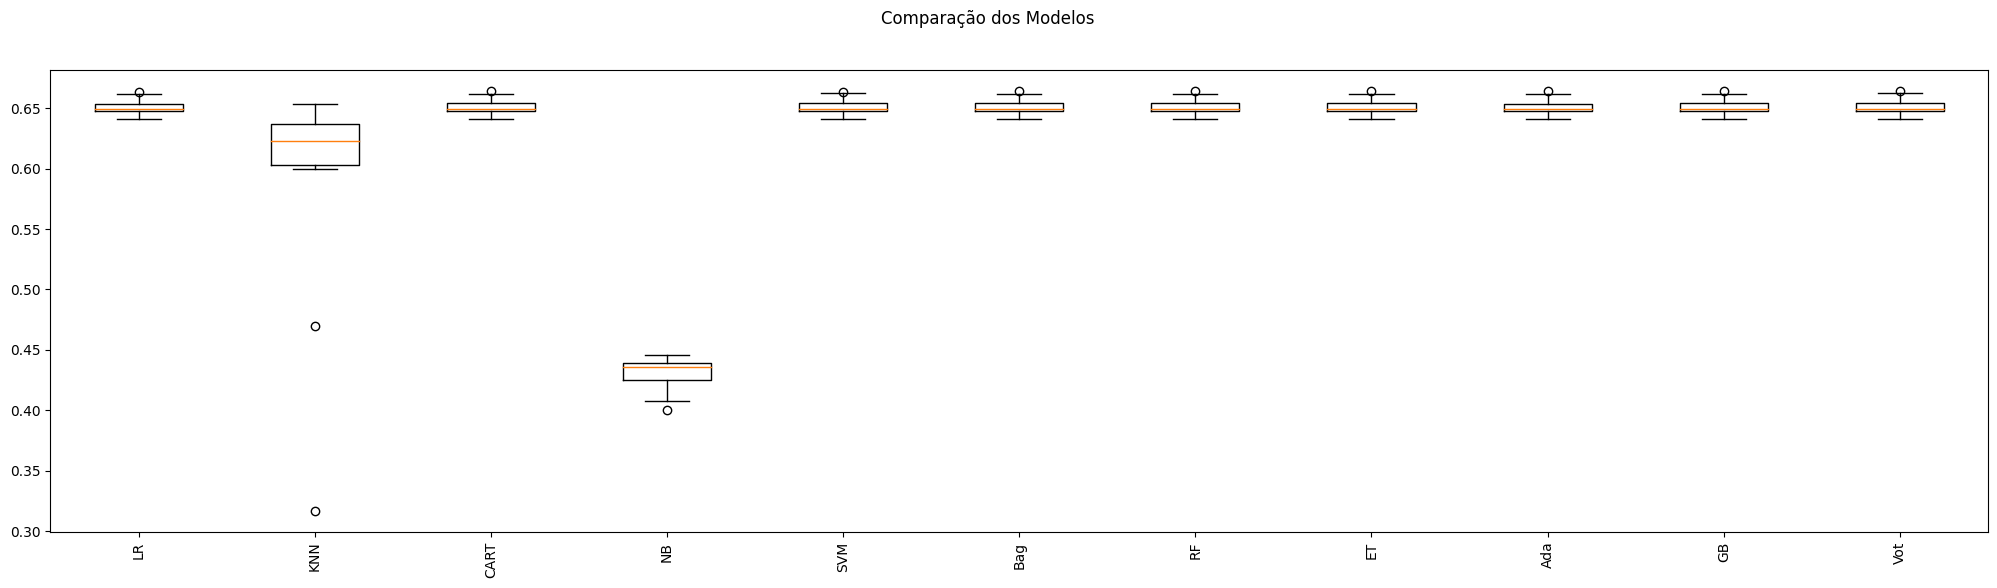

In [ ]:
# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC(C=0.1, gamma=1, kernel='rbf')
bases.append(('svm', model3))

# Criando os elementos do pipeline

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC(C=0.1, gamma=1, kernel='rbf'))
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Montando os pipelines

# Dataset original
pipelines.append(('LR', Pipeline([reg_log])))
pipelines.append(('KNN', Pipeline([knn])))
pipelines.append(('CART', Pipeline([cart])))
pipelines.append(('NB', Pipeline([naive_bayes])))
pipelines.append(('SVM', Pipeline([svm])))
pipelines.append(('Bag', Pipeline([bagging])))
pipelines.append(('RF', Pipeline([random_forest])))
pipelines.append(('ET', Pipeline([extra_trees])))
pipelines.append(('Ada', Pipeline([adaboost])))
pipelines.append(('GB', Pipeline([gradient_boosting])))
pipelines.append(('Vot', Pipeline([voting])))

# Executando os pipelines
t = time()
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train_rfe, y_train_rfe, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

print('Hyperparameter evaluation time: {} mins'.format(round((time() - t) / 60, 2)))

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Podemos reparar acima que o modelo Voting teve o melhor desempenho entre os demais modelos.

#### 7.3 Finalização do Modelo

In [ ]:
# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC(C=0.1, gamma=1, kernel='rbf')
bases.append(('svm', model3))

# Criando um modelo com todo o conjunto de treino
model = VotingClassifier(bases)
model.fit(X_train_rfe, y_train_rfe)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test_rfe)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test_rfe, predictions))

0.6513556618819777


Acima podemos reparar que nosso modelo teve um **desempenho com os dados de testes de 0.651**, muito semelhante ao **desempenho com os dados de treinamento que foi de 0.652**.

## Trabalho B - Deep Learning para um problema de processamento de linguagem natural (PLN)

### 1. Introdução e Definição do Problema

Iremos utilizar o dataset fhirfly/medicalquestions do Hugging Faces (https://huggingface.co/datasets/fhirfly/medicalquestions) que possui 23.297 perguntas rotuladas como médicas ou não médicas.

O conjunto de dados visa fornecer uma gama diversificada de questões que cobrem vários domínios médicos e não médicos.

As perguntas no conjunto de dados foram rotuladas manualmente por especialistas de domínio com base no contexto e conteúdo de cada pergunta.

A cada questão é atribuída o rótulo 1 se for determinada como uma questão médica e um rótulo de 0 se for classificada como uma questão não médica.

No final iremos ter um modelo que prevê se sua pergunta é uma questão médica ou não médica.

**Estrutura do conjunto de dados**

O conjunto de dados consiste em um único arquivo contendo as seguintes colunas:

- Texto: O texto da pergunta.
- Rótulo: O rótulo atribuído a cada pergunta, 1 (médico) ou 0 (não médico).

As perguntas são distribuídas uniformemente entre categorias médicas e não médicas, garantindo um conjunto de dados equilibrado para treinamento e avaliação.

### 2. Carga de dados

Abaixo iremos importar as bibliotecas necessárias e algumas pequenas configurações iniciais.

In [ ]:
# importações de bibliotecas
import numpy as np
import pandas as pd
import re
import nltk
import warnings

from time import time  # To time our operations
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.svm import SVC # algoritmo SVM
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from nltk.tokenize import word_tokenize # divide frases em palavras
from nltk.corpus import stopwords # eliminar palavras sem relevância para o modelo
from sklearn.feature_extraction.text import TfidfVectorizer # converte uma coleção de documentos brutos em uma matriz de recursos TF-IDF

from pickle import dump # salvar o modelo
from pickle import load # carregar o modelo

nltk.download('stopwords') # download dos stopwords
nltk.download('punkt') # Tokenizador de frases

# Algumas configurações iniciais
warnings.filterwarnings("ignore") # configuração para não exibir os warnings
pd.set_option('display.max_colwidth', None) # define a largura máxima das colunas

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


No trecho abaixo iremos fazer a carga do dataset

In [ ]:
# Carrega arquivo csv usando Pandas passando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/ThiRCosta/MVP-Sprint_2/main/dataset.csv"

# Informa o cabeçalho das colunas
atributos = ['LABEL', 'QUESTION']

# Lê o arquivo utilizando as colunas informadas
ds_med = pd.read_csv(url, names=atributos, skiprows=1, delimiter=',',
                     encoding = 'utf8')

# Lista os 5 primeiros e 5 últimos registros do dataset
ds_med.head(-10)

,LABEL,QUESTION
0,1,What is (are) Anal Cancer ?
1,1,How to prevent Anal Cancer ?
2,1,What is (are) Adult Central Nervous System Tumors ?
3,1,What is (are) Childhood Brain and Spinal Cord Tumors ?
4,1,What is (are) Childhood Astrocytomas ?
...,...,...
23281,0,When did the Space Age begin?
23282,0,When is the best time to plant lavender?
23283,0,When did the Chinese invent gunpowder?
23284,0,When do hydrangeas start to bloom?


### 3. Limpeza e preparação dos dados

Nessa etapa iremos fazer os devidos ajustes no dataset e preparar os dados para o treinamento e validação do modelo

In [ ]:
# Utilizando os stopwords em Inglês
st_words = stopwords.words('english')

# Preparação dos dados.
t = time()
for i in range(len(ds_med)):
  question = ds_med['QUESTION'][i]
  question = re.sub(r'[^A-Za-z]+', ' ', question).lower() # retira caracteres especiais e convertendo em minúsculas
  question = nltk.word_tokenize(question) # tokenização
  question = [word for word in question if word not in st_words] # remoção de stopwords
  ds_med['QUESTION'][i] = ' '.join(map(str,question))

print('Data cleaning time:: {} mins'.format(round((time() - t) / 60, 2)))
ds_med.head(-10)

Data cleaning time:: 0.23 mins


,LABEL,QUESTION
0,1,anal cancer
1,1,prevent anal cancer
2,1,adult central nervous system tumors
3,1,childhood brain spinal cord tumors
4,1,childhood astrocytomas
...,...,...
23281,0,space age begin
23282,0,best time plant lavender
23283,0,chinese invent gunpowder
23284,0,hydrangeas start bloom


### 4. Separação de dados de treino e teste

In [ ]:
# setando parâmetros para separador dos dados
test_size = 0.20
seed = 37

# Separação em conjuntos de treino e teste
X = ds_med['QUESTION']
y = ds_med['LABEL']

# Separando os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# vetorizando os dados de treino e teste
vect = TfidfVectorizer()
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

### 5. Treinamento do modelo

Dentre os modelos testados conforme lista abaixo, o SVC foi o que obtivemos a melhor acurácia.

- SVC
- LogisticRegression
- KNeighborsClassifier
- DecisionTreeClassifier
- RandomForestClassifier
- ExtraTreesClassifier
- AdaBoostClassifier
- GradientBoostingClassifier

In [ ]:
# utilizando o modelo SVC para treinamento
t = time()
modelo = SVC()
modelo.fit(X_train_vect, y_train)
print('Model training time: {} mins'.format(round((time() - t) / 60, 2)))

# Calculando a acurácia
pred = modelo.predict(X_test_vect)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Model training time: 0.51 mins
Accuracy: 0.9875536480686695


### 6. Usando o modelo

Abaixo iremos usar o modelo utilizando perguntas aleatórias que não existem no dataset utilizado para o treinamento e teste.

Como serão feitas algumas perguntas para avaliarmos o funcionanmento do modelo e evitarmos a repetição de algumas linhas de comando, iremos criar uma função chamada "use_model".

In [ ]:
def use_model(question):
    question_vec = vect.transform([question])
    predict = modelo.predict(question_vec)
    if predict == 1:
      answer = "Médico"
    else:
      answer = "Não Médico"
    return answer

In [ ]:
question_1 = "Are you allergic?"
resp = use_model(question_1)
print("Pergunta 1:", question_1)
print("Resposta 1:", resp)

question_2 = "Which car should I buy?"
resp = use_model(question_2)
print("\nPergunta 2:", question_2)
print("Resposta 2:", resp)

Pergunta 1: Are you allergic?
Resposta 1: Médico

Pergunta 2: Which car should I buy?
Resposta 2: Não Médico
